<h1><b> Saudi Arabia Used Car's Price Prediction</b> </h1>



<h2> Business Problem Understanding </h2>

context

Sebuah dealer mobil ingin menenentukan harga jual mobil bekas dengan menggunakan data analytics dan model Machine Learning untuk diimplementasikan kepada sales dealer tersebut. Pengunaan model ini bertujuan untuk menghindari kesalahan dalam memnberikan harga jual pada konsumen dan untuk juga meningkatkan pendapatan dealer & performa sales.

H0: tidak ada perbedaaan harga dari feature / characteristics sebuah mobil
<br>
H1: fitur mempengaruhi harga sebuah mobil bekas

<h5> Problem Statement </h5>
<p> Pendapatan dealer bisa berkurang karena permasalahan harga yang tidak tepat & salah. sehingga dealer ingin meningkatkan pendapatan & mencari harga yang optimal. karena tidak didasarkan data yang tidak informatif seperti data dan cara tradisional menentukan harga mobil bekas.Jika penentuan harga tidak optimal, dealer akan terus mengalami kerugian. </p>

<h5> Goals </h5>
<p>  Dealer ingin memprediksi harga mobil bekas dengan optimum dan maksimal untuk mendapatkan profit dan dealer ingin mengetahui ciri mobil yang memiliki harga yang bagus</p>

<H5> Analytic Approach </h5>
<p> Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang dapat memprediksi harga sebuah mobil bekas. kemudian kita akan membuat sebuah model yang digunakan untuk memprediksi harga mobil yang tepat berdasarkan features dan ciri dari mobil bekas. </p>


<h2> Metric Evaluation </h2>
<p> Target Metric</p>
<p> MAE <= 14.000 Riyadh Saudi / SAR </p>
<p> MAPE <= 20 </p>


### Data Understanding
**Dataset Source** : https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset

**Dataset Overview**
Dataset ini berisi informasi tentang mobil bekas yang dijual di Arab Saudi. Tujuan utama dari dataset ini adalah menyediakan fitur-fitur yang dapat digunakan untuk memprediksi harga mobil. Data mencakup detail spesifikasi mobil, asal negara, jarak tempuh, dan lokasi penjualan.
Dataset ini memiliki 13 fitur (kolom) dan jumlah data yang cukup besar, sehingga sangat cocok digunakan untuk tugas regresi.

**Feature Breakdown**</br>
Numerical Features:
- Year: Tahun produksi mobil. Ini adalah fitur numerik kontinu, namun juga bisa dianggap sebagai fitur ordinal.
- Engine_Size: Ukuran mesin mobil, kemungkinan dalam satuan liter.
- Mileage: Total kilometer yang telah ditempuh oleh mobil. Fitur ini mungkin mengandung outlier, seperti nilai yang sangat besar dalam cuplikan data.
- Price: Harga jual mobil. Ini adalah variabel target untuk model prediksi. Nilainya berupa angka kontinu, namun terdapat nilai 0 yang kemungkinan besar merupakan placeholder untuk harga yang belum dicantumkan atau hilang.

Categorical Features:
- Make: Merek atau produsen mobil (misalnya Toyota, Ford, Hyundai).
- Type: Model spesifik dari mobil (misalnya Corolla, Explorer, Sonata).
- Origin: Negara asal mobil, dengan nilai seperti 'Saudi' atau 'Other'.
- Color: Warna eksterior mobil. Terdapat nilai seperti "Another Color" yang menunjukkan perlunya pembersihan atau konsolidasi kategori.
- Options: Tingkat kelengkapan fitur mobil (misalnya 'Full', 'Semi Full', 'Standard').
- Fuel_Type: Jenis bahan bakar yang digunakan (misalnya 'Gas').
- Gear_Type: Jenis transmisi (misalnya 'Automatic').
- Region: Wilayah geografis atau kota tempat mobil dijual (misalnya 'Riyadh', 'Makkah').
- Negotiable: Fitur biner yang menunjukkan apakah harga bisa dinegosiasikan. Dataset menggunakan nilai boolean (TRUE/FALSE), yang telah dikonversi menjadi nilai numerik (1/0) dalam kode.

Note:
- kualitas dataset telah siap untuk digunakan dalam analisa use case memprediksi harga jual mobil bekas
- dataset merepresentasikan setiap karakteristik pada mobil bekas dengan komposisi tipe numerical & categorical


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('UsedCarsSA_Clean_EN.csv', delimiter=';', encoding='utf-8')

In [ ]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


Exploratory Data Analysis

General Analysis


Sebelum melakukan analisa, data ini akan kita lihat secara general agar kita bisa mendapatkan pemahaman dimensi dan apa saja insight yang bisa kita dapatkan.

In [ ]:
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Make        8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


Dari info() di atas, bisa kita perhatikan bahwa ada 13 jenis data di dalam dataset ini. Berdasarkan penuturan uploader atau author dari data ini di Kaggle.com, data-data di atas memiliki data dictionary sebagai berikut:

| Feature        | Description                               |
|----------------|-------------------------------------------|
| **Price**      | Harga Mobil di Listing Syarah.com           |
| **Make**       | Manufaktur Mobil                          |
| **Type**       | Tipe Mobil                                |
| **Year**       | Tahun Manufaktur Mobil                    |
| **Color**      | Warna Mobil                               |
| **Options**    | Jenis Opsi tipe Mobil                     |
| **Engine Size**| Ukuran Mesin                              |
| **Fuel Type**  | Tipe Bensin Mesin                         |
| **Gear_Type**  | Tipe Transmisi Mobil                      |
| **Region**     | Daerah Asal Listing                       |
| **Origin**     | Asal Mobil                                |
| **Mileage**    | Jumlah Penggunaan Mobil (Mile)            |
| **Negotiable** | Status Harga Mobil (Nego/Tetap) Jika Nego, maka Price = 0          |

In [ ]:
print("Rows, Columns:", df.shape)

Rows, Columns: (8035, 13)


Bisa di observasi bahwa dataset ini memiliki 104,455 data, 13 column dan 8035 rows. Ini berarti dataset ini berukuran Medium.

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print("Number of duplicated rows:", duplicate_count)

Number of duplicated rows: 3


Terdapat 3 row yang bersifat duplikasi. Ini akan dibersihkan di tahap pre-processing

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8035.0,2014.097698,5.757228,1963.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,8035.0,3.287729,1.517747,1.0,2.0,3.0,4.4,9.0
Mileage,8035.0,149148.801369,347448.024433,100.0,37000.0,101960.0,195000.0,20000000.0
Price,8035.0,53699.835843,71984.724635,0.0,0.0,37000.0,73750.0,1150000.0


In [ ]:
df.isnull().sum()

,0
Make,0
Type,0
Year,0
Origin,0
Color,0
Options,0
Engine_Size,0
Fuel_Type,0
Gear_Type,0
Mileage,0


Disini kita mengecek apakah ada dari dataset ini yang Missing datanya. Namun karena ini adalah dataset yang sudah di clean oleh author, maka tidak ada data yang kosong. Distribusi dari column numerical akan lebih mudah di visualisasikan dengan Boxplot dan histogram.

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


 Make : 59
Type: 381
Origin: 4
Color: 15
Options: 3
Fuel_Type: 3
Gear_Type: 2
Region: 27


Disini terlihat bahwa Type, Make, dan Region memiliki jumlah data unik yang tinggim dengan Type paling besar di 381, menunjukkan variasi dari mobil yang ada di dataset ini. Ini juga penting untuk di perhatikan ketika melakukan encoding agar data cardinality tidak terlalu besar.

In [ ]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

 Make : ['Chrysler' 'Nissan' 'Hyundai' 'Honda' 'Toyota' 'GMC' 'Chevrolet'
 'Mercedes' 'MINI' 'Lexus' 'Land Rover' 'Mazda' 'Ford' 'Kia' 'Genesis'
 'Cadillac' 'Geely' 'MG' 'Jeep' 'INFINITI' 'Dodge' 'Ferrari' 'Great Wall'
 'Jaguar' 'GAC' 'Renault' 'Suzuki' 'Peugeot' 'Changan' 'HAVAL' 'BMW'
 'Rolls-Royce' 'Porsche' 'Mitsubishi' 'Isuzu' 'Subaru' 'Zhengzhou'
 'Lincoln' 'Volkswagen' 'Daihatsu' 'FAW' 'Chery' 'Audi' 'Bentley'
 'Aston Martin' 'Mercury' 'Fiat' 'BYD' 'Classic' 'Hummer' 'Other'
 'Maserati' 'SsangYong' 'Lifan' 'Foton' 'Tata' 'Victory Auto' 'Škoda'
 'Iveco']
Type: ['C300' 'Patrol' 'Sunny' 'Elantra' 'Accord' 'Land Cruiser' 'Yukon'
 'Impala' 'Yaris' 'Camry' 'Tahoe' 'CLA' 'E' 'Corolla' 'Copper' 'Prado'
 'Civic' 'Furniture' 'RX' 'Range Rover' 'Avalon' 'Bus Urvan' 'Aurion'
 'Malibu' 'Rav4' 'CX9' 'Expedition' 'ES' 'Cadenza' 'Tucson' 'Platinum'
 'G80' 'Accent' 'Sonata' 'LX' 'Senta fe' 'GX' 'Azera' 'CT-S' 'EC7' 'ZS'
 'Kona' 'Grand Cherokee' 'Optima' 'S' 'M' 'Charger' 'Taurus'
 'GTB 599 Fiora

Disini kita ingin melihat adakah value yang tidak masuk akal atau bersifat outlier, seperti nama hewan di tipe mobil yang tidak ada wujudnya. Dikarenakan ini adalah dataset yang sudah di clean oleh author, maka tidak ada data yang tidak masuk akal disini.

## Target Variable Analysis

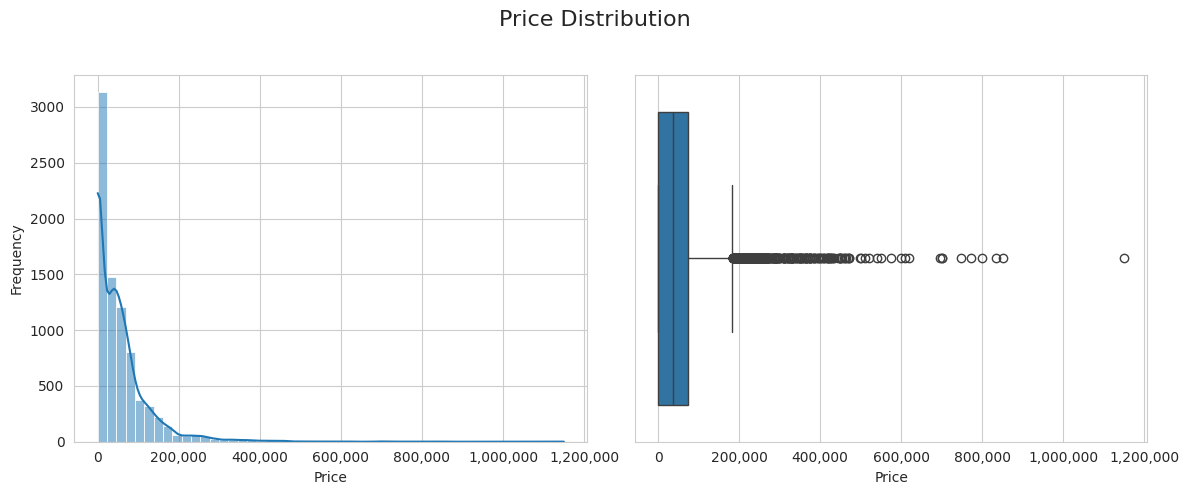

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.boxplot(x=df['Price'], ax=axes[1])
axes[1].set_xlabel("Price")
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

fig.suptitle("Price Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Untuk melihat dengan lebih mudah distribusi target variable yaitu harga mobil atau Price, maka kita akan melihat dengan Boxplot dan Histogram. Disini bisa dilihat adanya outlier yang sangat besar, di angka 400k ke atas. Datanya sendiri terlihat terdistribusi paling banyak atanra 0 sampai sekitar 300k untuk harga. Boxplot menunjukkan ada banyak outlier di atas 200k.

## Numerical Features Analysis


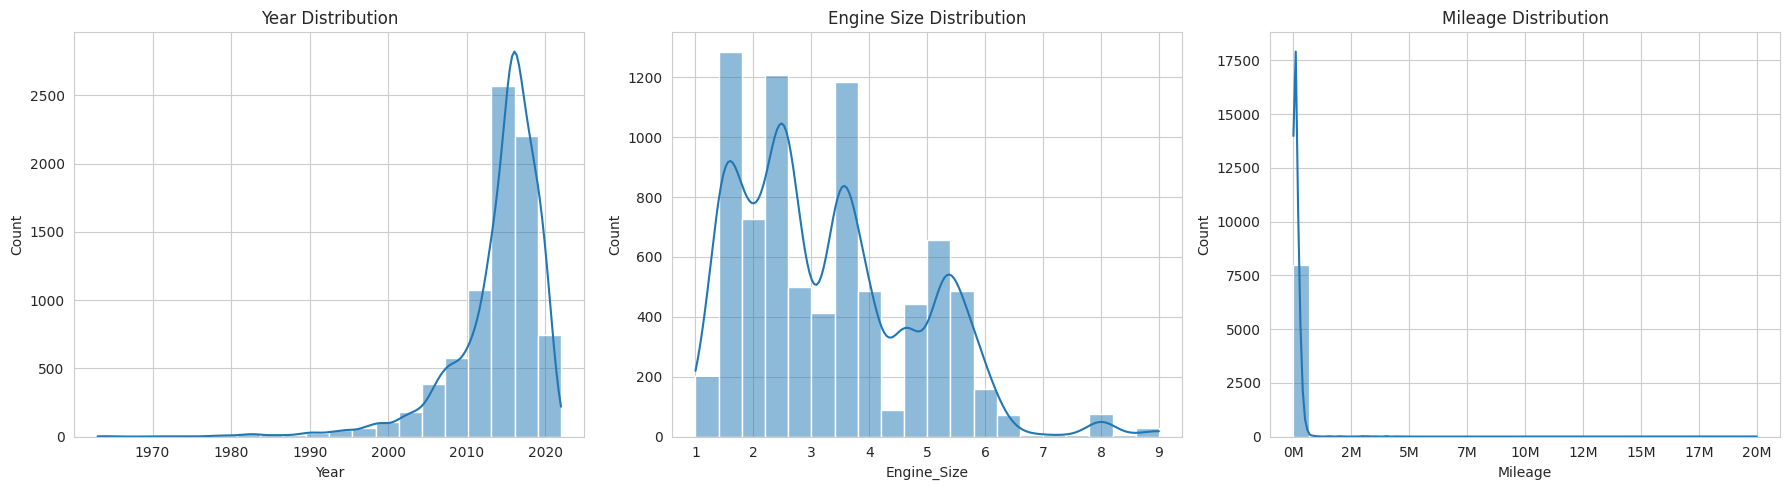

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Year'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Year Distribution")

sns.histplot(df['Engine_Size'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Engine Size Distribution")

sns.histplot(df['Mileage'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Mileage Distribution")
axes[2].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

plt.tight_layout()
plt.show()

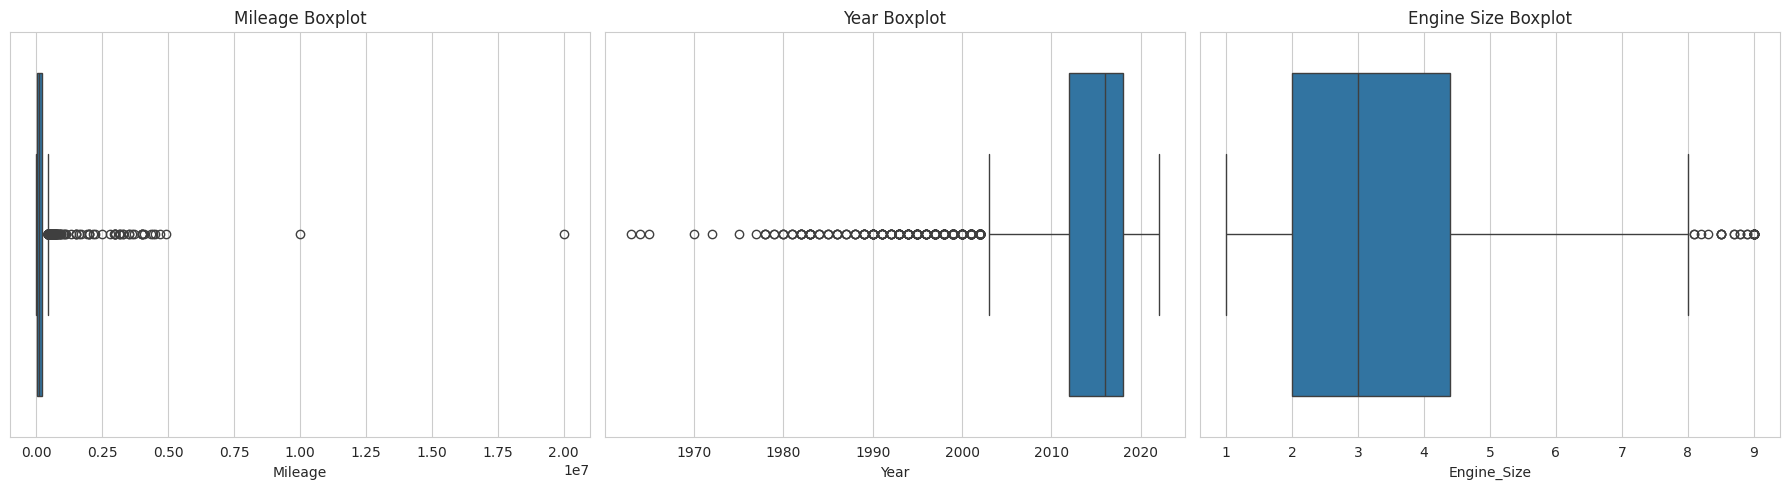

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x=df['Mileage'], ax=axes[0])
axes[0].set_title("Mileage Boxplot")

sns.boxplot(x=df['Year'], ax=axes[1])
axes[1].set_title("Year Boxplot")

sns.boxplot(x=df['Engine_Size'], ax=axes[2])
axes[2].set_title("Engine Size Boxplot")

plt.tight_layout()
plt.show()

Untuk memastikan distribusi setiap numerical column, maka kita akan membuat boxplot dan histogram untuk setiap column. Mileage menunjukkan outlier yang sangat besar, sehingga data distribusi normalnya sangat kecil box nya. Angka teratas menunjukkan 200 juta mileage, yang kecil kemungkinan datanya valid. Untuk Year, outlier tidak terlalu besar tapi sampel mobil dibawah tahun manufaktur 2000 termasuk kecil. Untuk mesin mobil terlihat ada sedikit outlier di atas 8L atau 8000 CC, ini akan kita explorasi nanti di outlier removal.

In [ ]:
df[['Price', 'Year', 'Engine_Size', 'Mileage']].skew()


,0
Price,3.484302
Year,-2.349956
Engine_Size,0.742251
Mileage,29.781068


Skew() memastikan bahwa Mileage memiliki outlier yang ekstrem ke sebelah kanan, Price juga memiliki skew kanan yang cukup besar, sedangkan year memiliki skew kiri yang berukuran sedang.\

## Categorical Features Analysis


### Makes

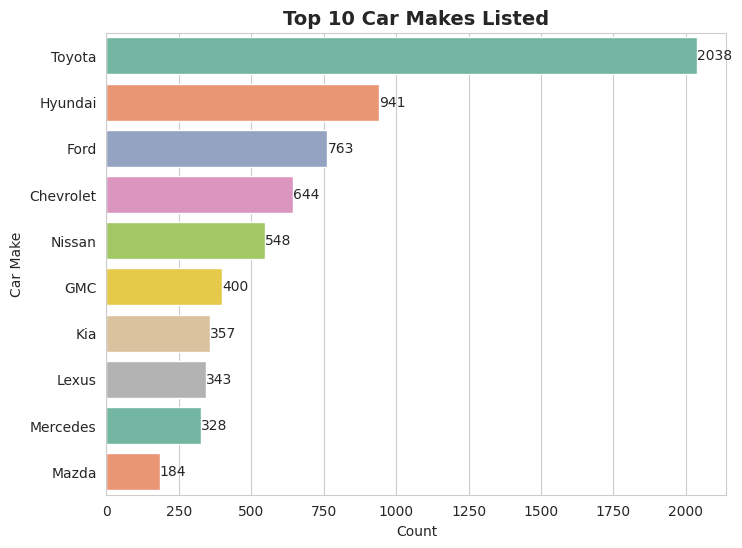

In [ ]:
top_makes = df[' Make '].value_counts().nlargest(10)

plt.figure(figsize=(8,6))
ax = sns.barplot(
    y=top_makes.index,
    x=top_makes.values,
    hue=top_makes.index,
    palette="Set2"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Top 10 Car Makes Listed", fontsize=14, weight="bold")
plt.xlabel("Count")
plt.ylabel("Car Make")
plt.show()


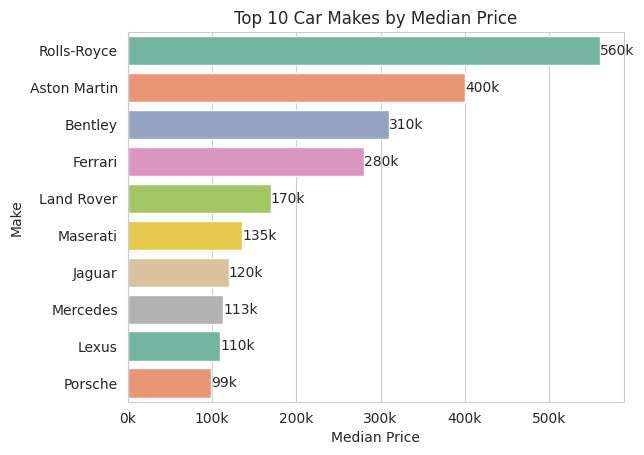

In [ ]:
top10_make_median_price = df.groupby(' Make ')['Price'].median().nlargest(10)
ax = sns.barplot(x=top10_make_median_price.values, y=top10_make_median_price.index, hue=top10_make_median_price.index, palette="Set2")
def format_k(val):
    return f'{int(val/1000)}k'
for container in ax.containers:
    ax.bar_label(container, fmt=format_k)

import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))
plt.xlabel("Median Price")
plt.ylabel("Make")
plt.title("Top 10 Car Makes by Median Price")
plt.show()

Dari chart diatas kita bisa melihat merek manufaktur mobil teratas berdasarkan jumlah listing merek tersebut dan harga median. Harga median diambil karena besarnya outlier pada Price, sehingga mean dikhawatirkan tidak memberi representasi yang akurat.

Disini bisa terlihat bahwa toyota adalah merek paling populer dengan lebih dari 2000 listing, diikuti Hyundai dengan 941 pada posisi kedua. bisa diperhatikan bahwa 5 merek teratas adalah manufaktur mobil yang berada di kelas menengah kebawah. Ini dikonfirmasi dengan tidak adanya merek tersebut di merek dengan 10 harga median teratas. Rolls Royce memiliki harga median termahal sedangkan lexus dan mercedes terbukti memiliki listing yang cukup banyak walaupun dari segment mewah.

### Types

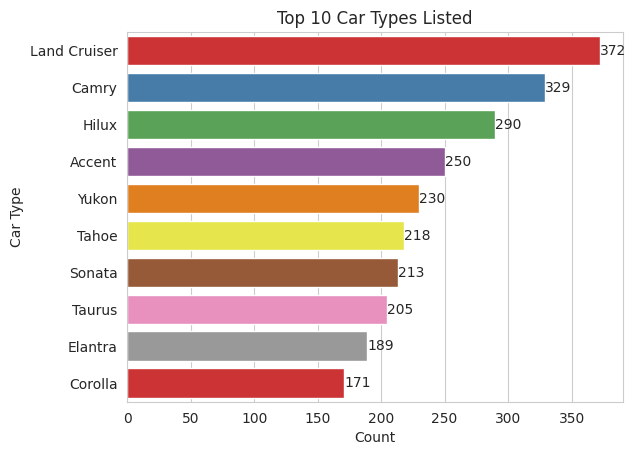

In [ ]:
top_types = df['Type'].value_counts().nlargest(10)
ax = sns.barplot(y=top_types.index, x=top_types.values, hue=top_types.index, palette="Set1")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')


plt.title("Top 10 Car Types Listed")
plt.xlabel("Count")
plt.ylabel("Car Type")
plt.show()

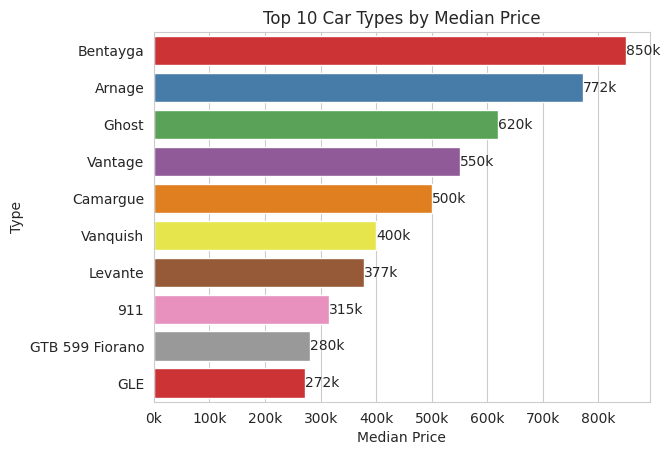

In [ ]:
top10_type_median_price = df.groupby('Type')['Price'].median().nlargest(10)
ax = sns.barplot(x=top10_type_median_price.values, y=top10_type_median_price.index, hue=top10_type_median_price.index, palette="Set1")
def format_k(val):
    return f'{int(val/1000)}k'
for container in ax.containers:
    ax.bar_label(container, fmt=format_k)

import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))
plt.xlabel("Median Price")
plt.ylabel("Type")
plt.title("Top 10 Car Types by Median Price")
plt.show()

Dari chart di atas kita bisa melihat dominasi toyota di pasar mobil syarah.com, dimana 4 mobil terbanyak di listing adalah model mereka. Tipe mobil termahal sendiri didominasi oleh brand yang bersifat outlier seperti bentayga dari bentley dan arnage dari aston martin, dimana sampel mereka termasuk sedikit namun bernilai tinggi.

### Fuel_Type

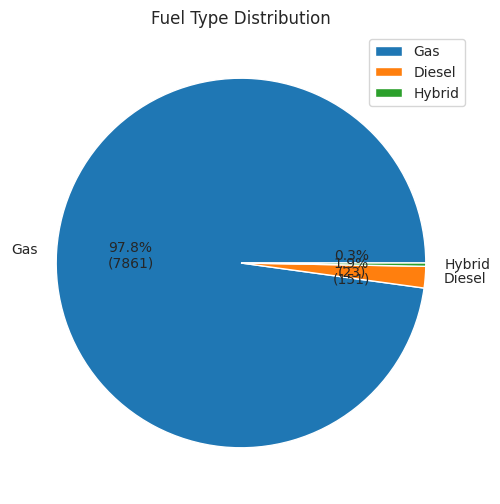

In [ ]:
def absolute_value(val):
    a = round(val/100.*df['Fuel_Type'].value_counts().sum(), 0)
    return f'{val:.1f}%\n({int(a)})'

df['Fuel_Type'].value_counts().plot.pie(
    autopct=absolute_value,
    figsize=(6,6),
    legend=True  # <-- Add legend
)

plt.title("Fuel Type Distribution")
plt.ylabel("")  # hides y-axis label
plt.show()


Disini kita bisa memperhatikan bahwa hampir 98% mobil di syarah.com adalah mobil berbahan bakar bensin. Ini sesuai dengan demografis timur tengah dimana bensin termasuk murah, sehingga kurangya permintaan market untuk bahan bakar alternatif.

### Gear_Type

Text(0.5, 1.0, 'Gear Type Distribution')

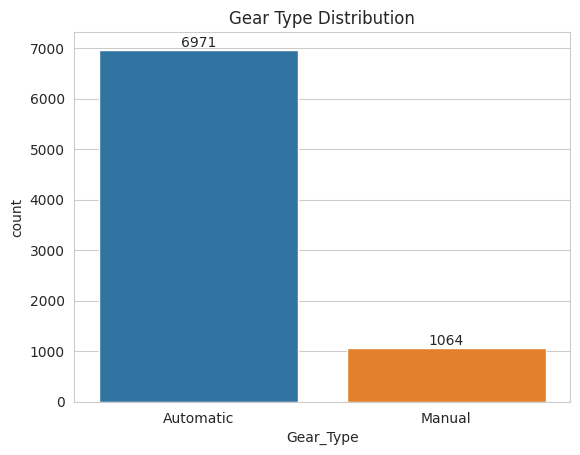

In [ ]:
ax=sns.countplot(x='Gear_Type', data=df, hue="Gear_Type", palette="tab10")
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Gear Type Distribution")


Gear Type menunjukkan bahwa hampir 7000 dari 8000 sekian listing adalah mobil transmisi automatic, memberi gambaran preferensi berkendara pengguna di timur tengah.

### Options

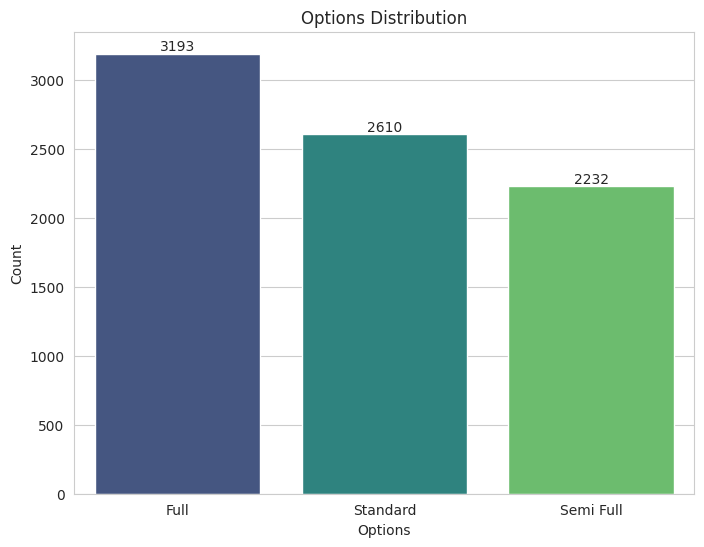

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Options', data=df, hue='Options', palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Options Distribution")
plt.xlabel("Options")
plt.ylabel("Count")
plt.show()

Option menunjukkan bahwa mobil di market bervariasi di tipe trim atau opsi mobil tersebut. Kebanyakan orang membeli langsung tipe teratas mobil tersebut, sedangkan tipe trim paling sedikit ada di Semi Full atau tipe menengah. Namun, oerbedaan nya terpaut sekitar 400 listing dari standard, menunjukkan bahwa kebanyakan orang memilih mobil dengan trim menengah-kebawah, namun tidak sedikit yang memilih untuk membeli opsi full mobil.

### Color

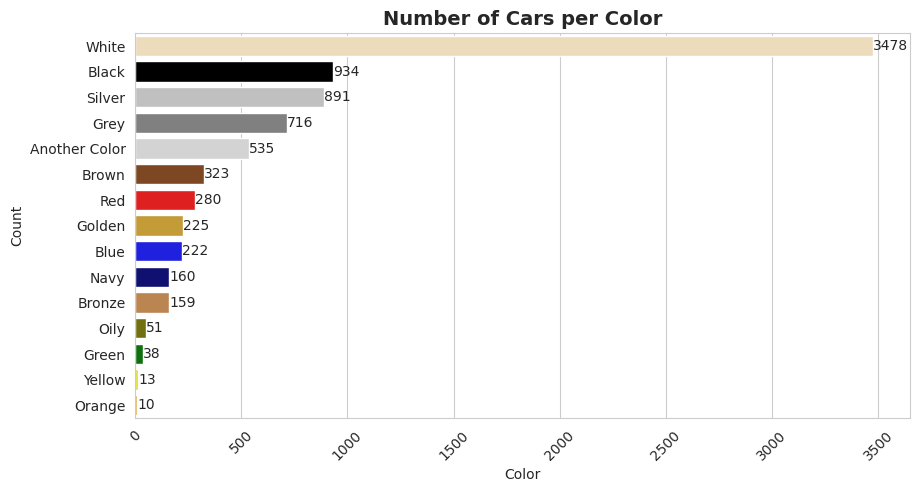

In [ ]:
color_map = {
    "White": "wheat",
    "Black": "black",
    "Silver": "silver",
    "Gray": "gray",
    "Grey": "gray",
    "Red": "red",
    "Blue": "blue",
    "Dark Blue": "navy",
    "Navy": "navy",
    "Green": "green",
    "Dark Green": "darkgreen",
    "Beige": "beige",
    "Champagne": "wheat",
    "Brown": "saddlebrown",
    "Maroon": "maroon",
    "Yellow": "yellow",
    "Gold": "gold",
    "Golden": "goldenrod",
    "Bronze": "peru",
    "Oily": "olive",
    "Another Color": "lightgray",
    "Orange": "orange"
}




plt.figure(figsize=(10,5))
ax=sns.countplot(
    data=df,
    y="Color",
    order=df["Color"].value_counts().index,
    hue="Color",
    palette=color_map
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Number of Cars per Color", fontsize=14, weight="bold")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Disini terlihat bahwa warna paling populer dengan margin yang signifikan adalah warna Putih. Ini menunjukkan preferensi market untuk warna mobil putih dimana warna tersebut bisa mengurangi panas matahari di mobil, sesuai dengan daerah timur tengah.

### Region

In [ ]:
import plotly.express as px

region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

fig = px.treemap(region_counts,
                 path=['Region'],
                 values='Count',
                 title="Listings per Region")

# Show region + number of listings inside boxes
fig.update_traces(textinfo="label+value")

# Adjust layout size (removes big margins)
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))

fig.show()


Di sini terlihat bahwa market terbesar ada di Riyadh, yang merupakan ibu kota dari Saudi Arabia. Ini diikuti dengan 2 kota besar lainnya yaitu Dammam Dan Jeddah, sedangkan daerah2 lain memiliki listing yang jauh lebih sedikit. Dengan total lebih dari 5500 dari 8000 sekian listing, maka mayoritas listing mobil ada di 3 kota besar Saudi Arabia

Origin

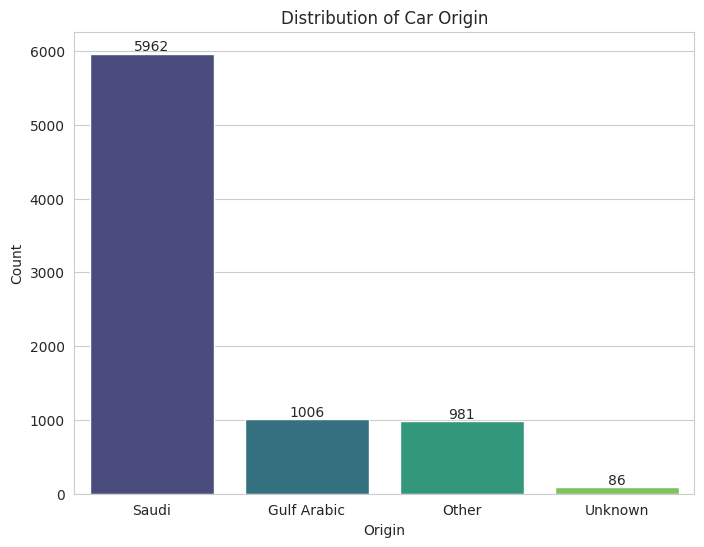

Data origin membuktikan bahwa kebanyakan mobil di listing berasal dari saudi pada saat pembelian baru. namun, lebih dari 1000 listing berasal dari negara2 gulf atau timur tengah lainnya, sedangkan 1050 sekian data tidak diketahui asalnya.

### Negotiable

/tmp/ipython-input-1882826077.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




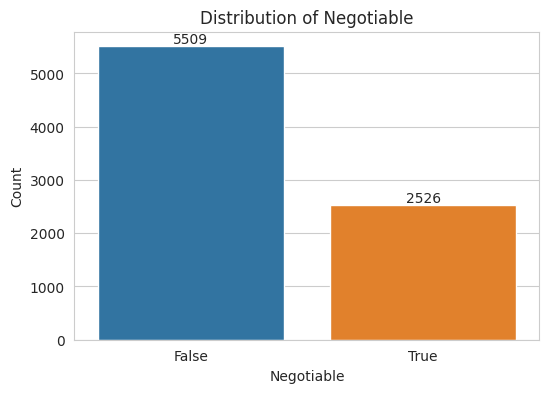

In [ ]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Negotiable', data=df, palette="tab10")
plt.title('Distribution of Negotiable')
plt.xlabel('Negotiable')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Data di atas menunjukkan mayoritas listing sudah memiliki harga tetap, Namun, ada 2500 an  data yang memiliki status bisa di negosiasi. Ini berarti listing mobil tersebut dihargai 0, sehingga perlu dilakukan aksi untuk membersihkan data ini sebelum modelling.

## Insights Analysis

### Outlier Sanity Check

Untuk membuang outlier, kita memerlukan data standar untuk memastikan ujung batas dari data. Menggunakan sanity check dimana kita melihat langsung di syarah.com dan kompetitornya seperti Dubizzle, terlihat bahwa mobil dengan mesin terbesar adalah 6.4 liter. Di boxplot sebelumnya terlihat bahwa ukuran mesin mobil di atas 8 adalah outlier, namun sanity check membuktikan outlier teratas yang sesungguhnya

In [ ]:
count_above_64 = (df['Engine_Size'] > 6.4).sum()
print("Number of rows with Engine_Size above 6.4:", count_above_64)

Number of rows with Engine_Size above 6.4: 132


Setelah pengecekan, terlihat bahwa jumlah data outlier di atas 6.4 liter adalah 132, yang merupakan kurang dari 2% data, maka data ini bisa dibuang dengan efek minimal untuk representasi.

In [ ]:
count_high_mileage = (df['Mileage'] > 900000).sum()
print("Number of rows with Mileage above 900,000:", count_high_mileage)

Number of rows with Mileage above 900,000: 46


In [ ]:
count_low_mileage = (df['Mileage'] < 100).sum()
print("Number of rows with Mileage lower than 100:", count_low_mileage)

Number of rows with Mileage lower than 100: 0


Sanity check juga dilakukan untuk Mileage. berdasarkan beberapa referensi majalah dan badan automotif dunia seperti US department of Transport, mereka mengatakan bahwa rata2 mobil digunakan antara 12k sampai 15k Miles per tahun. Asumsikan bahwa sebuah mobil tertua di listing yaitu tahun 1963, digunakan reguler per tahun selama 60 tahun dengan rata2 teratas yaitu 15k, maka batas atas yang masuk akal adalah 900k miles. Terlihat data di atas batas ini sangat sedikit, kurang dari 1%, maka akan dibuang tanpa efek yang besar ke representasi.

In [ ]:
df_EDA = df[df['Negotiable'] == False].copy()

df_EDA.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False


In [ ]:
df_EDA = df_EDA[(df_EDA['Mileage'] <= 900000) & (df_EDA['Engine_Size'] <= 6.4)]
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Make        5429 non-null   object 
 1   Type         5429 non-null   object 
 2   Year         5429 non-null   int64  
 3   Origin       5429 non-null   object 
 4   Color        5429 non-null   object 
 5   Options      5429 non-null   object 
 6   Engine_Size  5429 non-null   float64
 7   Fuel_Type    5429 non-null   object 
 8   Gear_Type    5429 non-null   object 
 9   Mileage      5429 non-null   int64  
 10  Region       5429 non-null   object 
 11  Price        5429 non-null   int64  
 12  Negotiable   5429 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 556.7+ KB


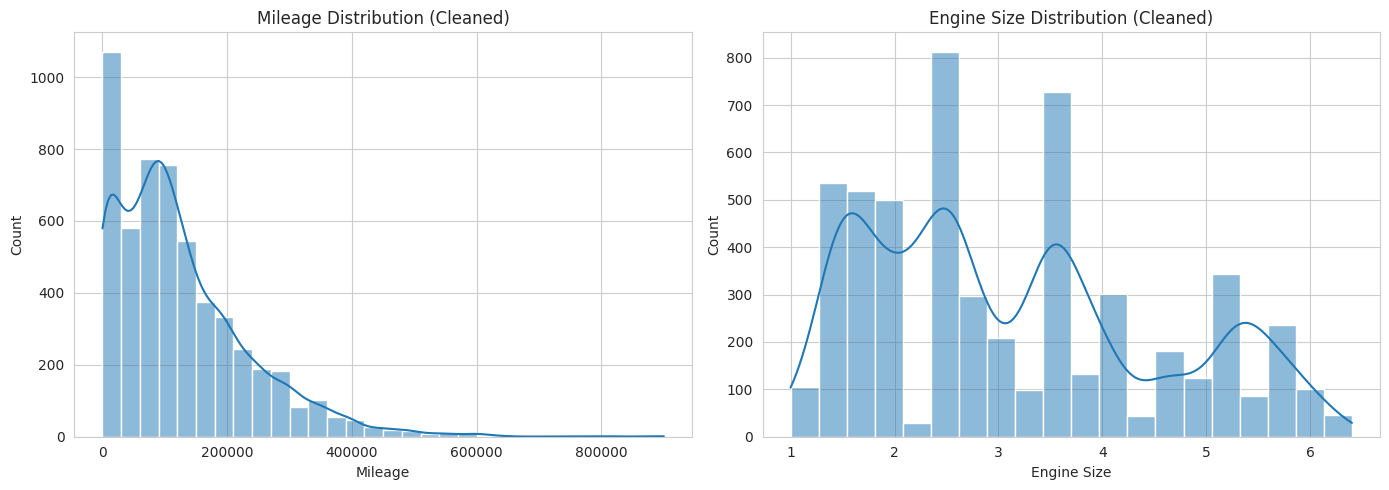

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_EDA['Mileage'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Mileage Distribution (Cleaned)")
axes[0].set_xlabel("Mileage")

sns.histplot(df_EDA['Engine_Size'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Engine Size Distribution (Cleaned)")
axes[1].set_xlabel("Engine Size")

plt.tight_layout()
plt.show()

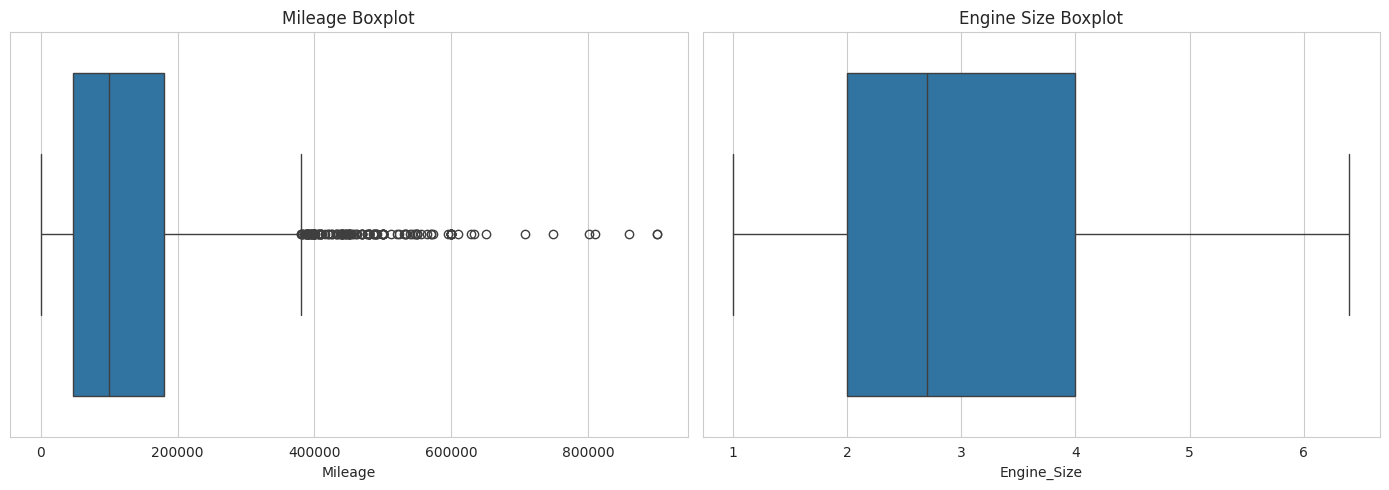

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_EDA['Mileage'], ax=axes[0])
axes[0].set_title("Mileage Boxplot")

sns.boxplot(x=df_EDA['Engine_Size'], ax=axes[1])
axes[1].set_title("Engine Size Boxplot")

plt.tight_layout()
plt.show()

Terlihat bahwa engine size berhasil dibershkan dari outlier, namun Mileage masih memiliki outlier di atas 380k Miles. Aksi pembersihan lanjutan bisa digunakan dengan asumsi penggunaan mobil yaitu dengan membagi jumlah mileage dengan umur mobil. dari sini, kita bisa membuang mobil outlier tambahan tanpa memberi efek kepada representasi yang terbilang masuk akal.

### Age and Mileage_per_year

Untuk pembersihan dan insight analysis lebih lanjut, penggunaan per tahun bisa dilihat dengan membagi jumlah mileage dengan umur mobil. oleh karena itu, column "Age" dibuat dengan asumsi tahun terakhir dari tanggal author dataset mengunggah dataset ini ke Kaggle.com

In [ ]:
df_EDA["Age"] = 2022 - df_EDA["Year"]
df_EDA["Mileage_per_year"] = (df_EDA["Mileage"] / df_EDA["Age"]).astype("int64")

df_EDA.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 8034
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Make             5429 non-null   object 
 1   Type              5429 non-null   object 
 2   Year              5429 non-null   int64  
 3   Origin            5429 non-null   object 
 4   Color             5429 non-null   object 
 5   Options           5429 non-null   object 
 6   Engine_Size       5429 non-null   float64
 7   Fuel_Type         5429 non-null   object 
 8   Gear_Type         5429 non-null   object 
 9   Mileage           5429 non-null   int64  
 10  Region            5429 non-null   object 
 11  Price             5429 non-null   int64  
 12  Negotiable        5429 non-null   bool   
 13  Age               5429 non-null   int64  
 14  Mileage_per_year  5429 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 641.5+ KB


terlihat bahwa data yang baru berhasil dibuat tanpa data loss

In [ ]:
df_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5429.0,2014.898324,5.103459,1963.0,2014.0,2016.0,2018.0,2021.0
Engine_Size,5429.0,3.126745,1.385494,1.0,2.0,2.7,4.0,6.4
Mileage,5429.0,125941.560693,109987.506338,100.0,46505.0,100000.0,180000.0,900000.0
Price,5429.0,78247.316449,74813.110065,0.0,35000.0,58000.0,94000.0,1150000.0
Age,5429.0,7.101676,5.103459,1.0,4.0,6.0,8.0,59.0
Mileage_per_year,5429.0,18960.145515,12994.216635,3.0,10440.0,18181.0,26187.0,227500.0


In [ ]:
df_EDA.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Age,Mileage_per_year
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False,4,25750
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False,3,24139
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False,3,38051
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False,3,13970
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False,4,9750


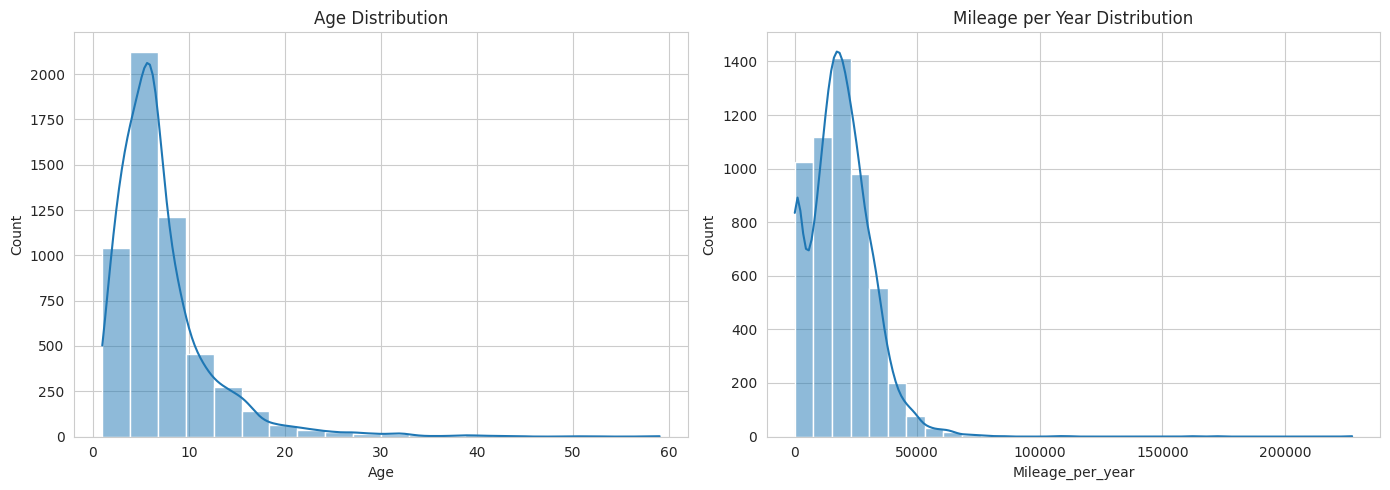

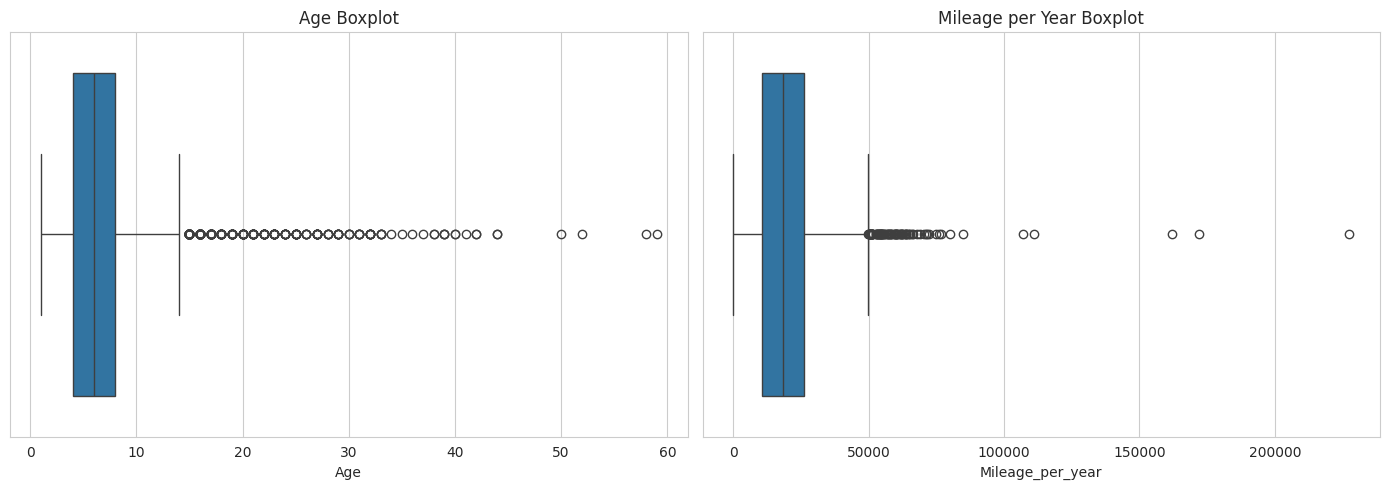

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_EDA['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df_EDA['Mileage_per_year'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Mileage per Year Distribution")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_EDA['Age'], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(x=df_EDA['Mileage_per_year'], ax=axes[1])
axes[1].set_title("Mileage per Year Boxplot")

plt.tight_layout()
plt.show()

Distribusi dari kedua kolom baru ini masih me representasikan outlier yang tinggi untuk Mileage per tahun, yaitu di atas 50k miles per tahun. Sedangkan distribusi Age berbanding terbalik sesuai dengan cara pembuatan data itu dari Year yaitu di atas 15 tahun.

### New Columns Outlier Removal

In [ ]:
count_age_above_20 = (df_EDA['Age'] > 20).sum()
print(f"Number of rows with Age above 20 in df_EDA: {count_age_above_20}")

Number of rows with Age above 20 in df_EDA: 139


Sesuai dengan hasil boxplot, terlihat bahwa di atas 15 tahun terdapat outlier yang belum di lakukan pembersihan. Angka 20 tahun diambil untuk pengecekan kedua karena untuk 15 tahun, angkanya di asumsikan terlalu signifikan di atas 300 data. Dengan 139 data di atas 20 tahun, model akhir akan ada limitasi di atas usia tersebut dengan akurasi lebih baik untuk data point yang lebih banyak sampel nya.

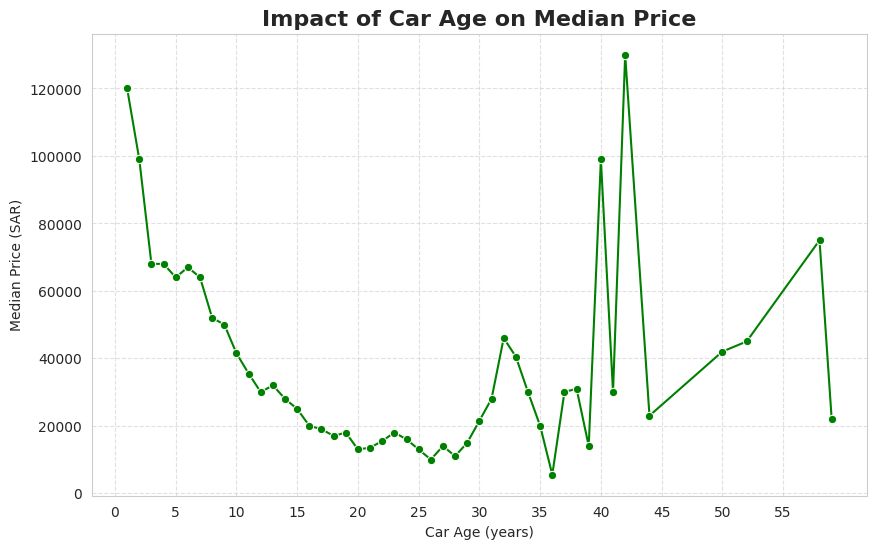

In [ ]:
age_price = (
    df_EDA.groupby("Age")["Price"]
    .median()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=age_price,
    x="Age",
    y="Price",
    marker="o",
    color="green"
)

plt.title("Impact of Car Age on Median Price", fontsize=16, weight="bold")
plt.xlabel("Car Age (years)")
plt.ylabel("Median Price (SAR)")
plt.grid(True, linestyle="--", alpha=0.6)

max_age = age_price["Age"].max()
plt.xticks(np.arange(0, max_age+1, 5))

plt.show()


Disini juga bisa terlihat bahwa mobil di atas 25 tahun mulai tidak stabil. Ini bisa dijelaskan dengan adanya mobil koleksi dan antik yang dijual di syarah.com. Dengan ini, maka data di atas 20 tahun akan dibuang karena kurangnya representasi mobil koleksi/antik yang bagus.

In [ ]:
count_mileage_per_year_above_50000 = (df_EDA['Mileage_per_year'] > 50000).sum()
print(f"Number of rows with Mileage per year above 50,000 in df_EDA: {count_mileage_per_year_above_50000}")

Number of rows with Mileage per year above 50,000 in df_EDA: 81


In [ ]:
count_mileage_per_year_above_50000 = (df_EDA['Mileage_per_year'] > 35000).sum()
print(f"Number of rows with Mileage per year above 35,000 in df_EDA: {count_mileage_per_year_above_50000}")

Number of rows with Mileage per year above 35,000 in df_EDA: 494


Sanity check kami membuktikan bahwa rata2 pengendara di timur tengah terutama negara yang luas seperti saudi arabia memiliki rata2 mileage per tahun sekitar 20k miles ke bawah. Khusus untuk transportasi publik seperti taksi online, batas atas yang kami temukan adalah 35k per tahun. Namun, karena besarnya representasi mobil pada mileage ini, kami menggunakan hasil boxplot dan mengecek data di atas 50k per tahun. Terbukti bahwa jumlah representasinya lebih sedikit di angka 81 dibandingkan dengan 494 di 35k miles.

#### Clean Dataset for EDA

In [ ]:
df_EDA = df_EDA[(df_EDA['Mileage_per_year'] <= 50000) & (df_EDA['Age'] <= 20)].copy()
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5209 entries, 0 to 8034
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Make             5209 non-null   object 
 1   Type              5209 non-null   object 
 2   Year              5209 non-null   int64  
 3   Origin            5209 non-null   object 
 4   Color             5209 non-null   object 
 5   Options           5209 non-null   object 
 6   Engine_Size       5209 non-null   float64
 7   Fuel_Type         5209 non-null   object 
 8   Gear_Type         5209 non-null   object 
 9   Mileage           5209 non-null   int64  
 10  Region            5209 non-null   object 
 11  Price             5209 non-null   int64  
 12  Negotiable        5209 non-null   bool   
 13  Age               5209 non-null   int64  
 14  Mileage_per_year  5209 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 615.5+ KB


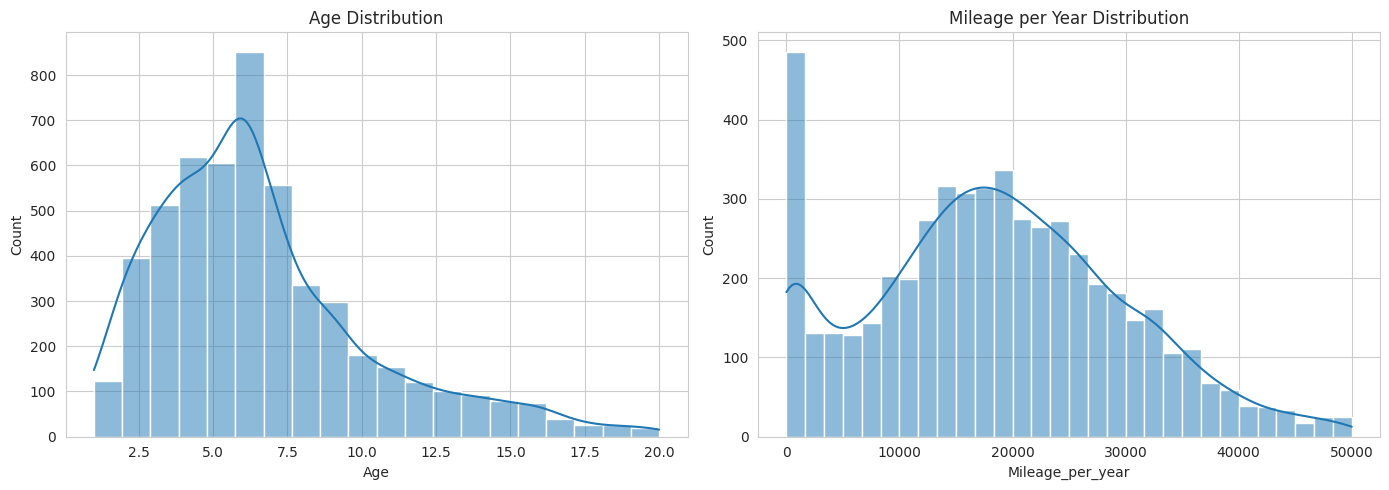

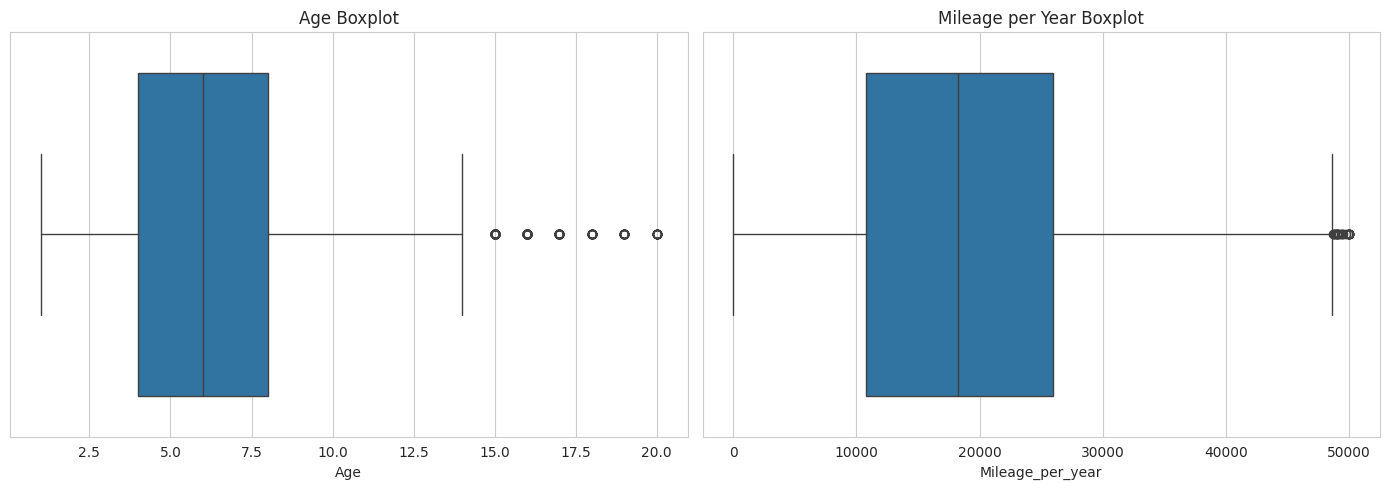

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_EDA['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df_EDA['Mileage_per_year'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Mileage per Year Distribution")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_EDA['Age'], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(x=df_EDA['Mileage_per_year'], ax=axes[1])
axes[1].set_title("Mileage per Year Boxplot")

plt.tight_layout()
plt.show()

In [ ]:
print("Skewness of Mileage_per_year:", df_EDA['Mileage_per_year'].skew())
print("Skewness of Age:", df_EDA['Age'].skew())

Skewness of Mileage_per_year: 0.23346311628396269
Skewness of Age: 1.1188658865763457


Bisa dilihat bahwa pembuangan outlier berhasil mereduksi outlier dengan lebih baik. Outlier di atas 14 tahun terlihat ada 6 cluster, sedangkan untuk mileage outlier ada di atas 48k miles namun lebih kecil distribusinya. Skewness untuk mileage ada di angka 0.23 yang menunjukkan data hampir simetris, sedangkan masih ada skew yang cukup signifikan untuk age. Beberapa referensi menunjukkan bahwa mobil dengan usia tua merupakan hal yang wajar di daerah Gulf, sehingga penemuan ini merepresentasikan demografis timur tengah sewajarnya.

### Median Price by Car Age

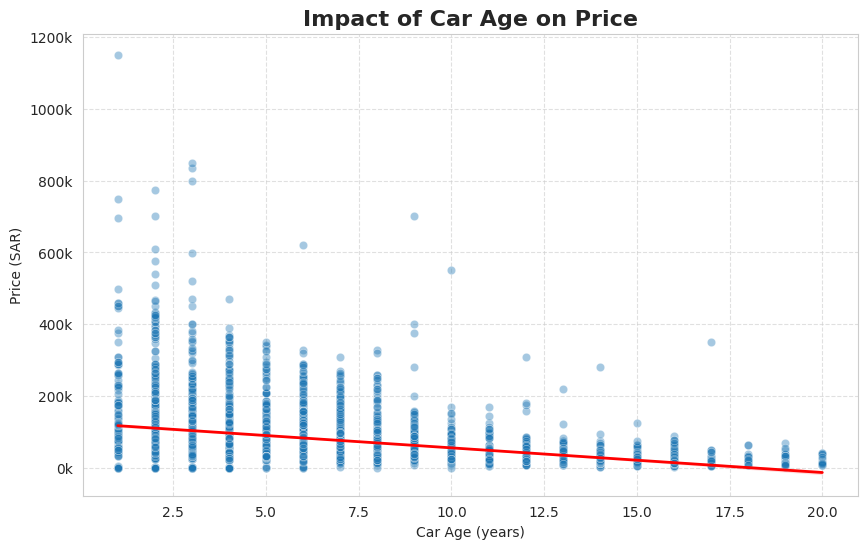

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df_EDA,
    x="Age",
    y="Price",
    alpha=0.4,
)

sns.regplot(
    data=df_EDA,
    x="Age",
    y="Price",
    scatter=False,
    color="red",
    line_kws={"linewidth":2}
)

plt.title("Impact of Car Age on Price", fontsize=16, weight="bold")
plt.xlabel("Car Age (years)")
plt.ylabel("Price (SAR)")

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Di scatterplot di atas bisa terlihat bahwa kebanyakan mobil ada di atas 10 tahun, namun ada kejatuhan harga yang signifikan di saat mobil berusia 8 tahun ke atas. trend line juga membuktikan bahwa ada relasi negatif antara usia mobil dan harga dimana semakin tua sebuah mobil maka semakin kecil harganya. Chart ini juga membuktikan bahwa pembuangan outlier menunjukkan distribusi listing kebanyakan ada di kurun harga menengah ke bawah yaitu 400k SAR ke bawah.

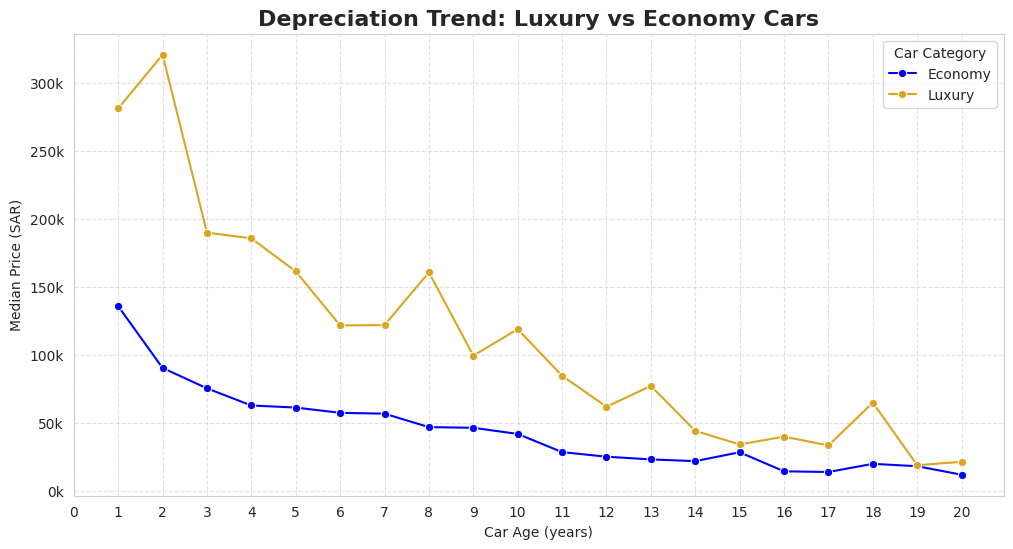

In [ ]:
import matplotlib.ticker as mtick

median_price = (
    df_EDA.groupby([" Make ", "Age"])["Price"]
    .median()
    .reset_index()
)

top_makes = df_EDA[" Make "].value_counts().nlargest(10).index
median_price_top = median_price[median_price[" Make "].isin(top_makes)]


luxury_brands = {"Mercedes", "Lexus"}
median_price_grouped = (
    median_price_top
    .assign(
        Category=lambda d: d[" Make "].apply(lambda x: "Luxury" if x in luxury_brands else "Economy")
    )
    .groupby(["Category", "Age"])["Price"].median().reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=median_price_grouped,
    x="Age",
    y="Price",
    hue="Category",
    marker="o",
    palette={"Luxury": "#DAA520", "Economy": "blue"}
)

plt.title("Depreciation Trend: Luxury vs Economy Cars", fontsize=16, weight="bold")
plt.xlabel("Car Age (years)")
plt.ylabel("Median Price (SAR)")
plt.legend(title="Car Category")
plt.grid(True, linestyle="--", alpha=0.6)

# ✅ Format Y-axis to show in 'k'
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

max_age = median_price_grouped["Age"].max()
plt.xticks(np.arange(0, max_age+1, 1))

plt.show()


Depreciation line di atas didasarkan dari analisa 10 merek mobil terbanyak di Syarah.com, dimana kedua merek mewah atau luxury disana adalah Lexus dan mercedes. Dengan menggabungkan kedua merek tersebut untuk representasi mobil mewah, bisa terlihat bahwa mobil mewah kehilangan harga jual yang signifikan setelah 2 tahun. Ini sesuai dengan perilaku manufaktur didunia yang sering memberikan pengubahan dan improvisasi pada mobil mereka setiap 3-5 tahun. Untuk mobil ekonomi terlihat hilangnya harga justru di antara tahun pertama ke tahun ke 2. Ini merepresentasikan bahwa mobil ekonomi lebih kurang menarik untuk dibeli bekas setelah 1 tahun, namun menjadi lebih stabil antara 5 sampai 7 tahun.

### Car Usage vs Depreciation

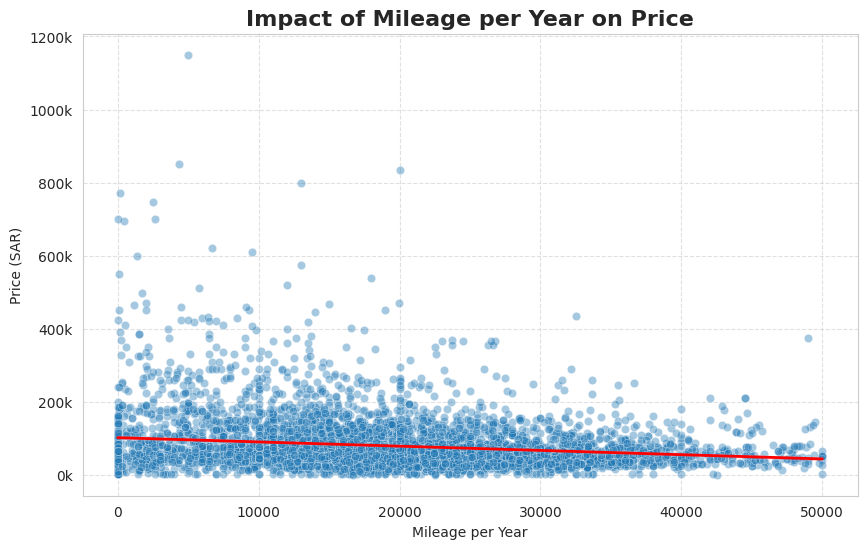

In [ ]:
plt.figure(figsize=(10,6))

# Scatterplot
sns.scatterplot(
    data=df_EDA,
    x="Mileage_per_year",
    y="Price",
    alpha=0.4,
)

# Regression line
sns.regplot(
    data=df_EDA,
    x="Mileage_per_year",
    y="Price",
    scatter=False,
    color="red",
    line_kws={"linewidth":2}
)

# Titles & labels
plt.title("Impact of Mileage per Year on Price", fontsize=16, weight="bold")
plt.xlabel("Mileage per Year")
plt.ylabel("Price (SAR)")

# Format y-axis with 'k'
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


scatterplot diatas menunjukkan trend negatif yang relatif kecil di antara intensitas penggunaan dengan harga mobil itu sendiri.  beberapa titik harga terlihat tinggi di angka 20k miles ke bawah, yang menunjukkan bahwa mobil yang mahal tidak digunakan lebih dari normal di timur tengah, sedangkan mobil di sekitar SAR 100k ke bawah terlihat digunakan sampai batas maximal di 50k miles.

/tmp/ipython-input-4086701262.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-4086701262.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



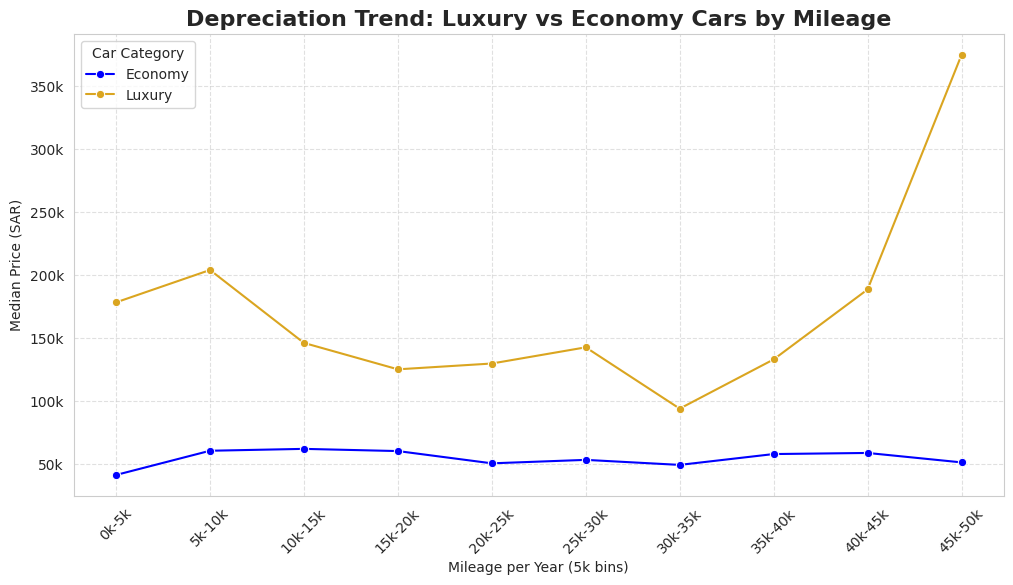

In [ ]:
bin_size = 5000
bins = range(0, 50000 + bin_size, bin_size)
labels = [f"{i//1000}k-{(i+bin_size)//1000}k" for i in bins[:-1]]

df_EDA["Mileage_bin"] = pd.cut(
    df_EDA["Mileage_per_year"],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


# Median price by make & mileage bin
median_price = (
    df_EDA.groupby([" Make ", "Mileage_bin"])["Price"]
    .median()
    .reset_index()
)

# Top 10 makes
top_makes = df_EDA[" Make "].value_counts().nlargest(10).index
median_price_top = median_price[median_price[" Make "].isin(top_makes)]

# Luxury vs Economy grouping
luxury_brands = {"Mercedes", "Lexus"}
median_price_grouped = (
    median_price_top
    .assign(
        Category=lambda d: d[" Make "].apply(lambda x: "Luxury" if x in luxury_brands else "Economy")
    )
    .groupby(["Category", "Mileage_bin"])["Price"].median().reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=median_price_grouped,
    x="Mileage_bin",
    y="Price",
    hue="Category",
    marker="o",
    palette={"Luxury": "#DAA520", "Economy": "blue"}
)

plt.title("Depreciation Trend: Luxury vs Economy Cars by Mileage", fontsize=16, weight="bold")
plt.xlabel("Mileage per Year (5k bins)")
plt.ylabel("Median Price (SAR)")
plt.legend(title="Car Category")
plt.grid(True, linestyle="--", alpha=0.6)

# ✅ Format Y-axis to show in 'k'
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.xticks(rotation=45)  # cleaner labels
plt.show()

Chart di atas lebih memperjelas market antara mobil mewah dengan mobil ekonomi. Untuk mobil ekonomi mulai kehilangan harga jual setelah pemakaian di atas 20k, atau di atas rata2. sedangkan mobil mewah mulai hilang nilainya di penggunaan 5k sampai 10k ke atas.

### Region Analysis

Dengan jumlah region yang banyak namun kurang stabil distribusinya, maka kita akan meminimalisir region yang kurang memberi representasi.

In [ ]:
region_counts = df_EDA['Region'].value_counts()
print("Number of rows per region:")
print(region_counts)

Number of rows per region:
Region
Riyadh            2214
Dammam            1068
Jeddah             749
Al-Medina          155
Qassim             148
Al-Ahsa            148
Makkah             127
Aseer              112
Tabouk              62
Taef                62
Khobar              60
Jazan               52
Jubail              49
Abha                36
Hafar Al-Batin      26
Hail                25
Al-Baha             22
Najran              20
Yanbu               17
Al-Jouf             15
Arar                12
Al-Namas            10
Besha                5
Qurayyat             5
Wadi Dawasir         4
Sakaka               4
Sabya                2
Name: count, dtype: int64


terlihat bahwa ada beberapa region dengan listing kurang dari 15. Angka 15 diambil agar region dibawahnya bisa bersatu menjadi region "Other" dan bisa menjadi region dengan representasi sekitar 50 an listing.

In [ ]:
regions_to_aggregate = region_counts[region_counts <= 15].index

df_EDA['Region'] = df_EDA['Region'].replace(regions_to_aggregate, 'Other')

print(df_EDA['Region'].value_counts())

Region
Riyadh            2214
Dammam            1068
Jeddah             749
Al-Medina          155
Qassim             148
Al-Ahsa            148
Makkah             127
Aseer              112
Taef                62
Tabouk              62
Khobar              60
Other               57
Jazan               52
Jubail              49
Abha                36
Hafar Al-Batin      26
Hail                25
Al-Baha             22
Najran              20
Yanbu               17
Name: count, dtype: int64


terlihat bahwa representasi daerah minor menjadi limitasi model, namun bisa membuat jumlah region lebih sedikit, mengurangi kardinality dengan diharapkan efek positif ke akurasi model.

/tmp/ipython-input-761328945.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




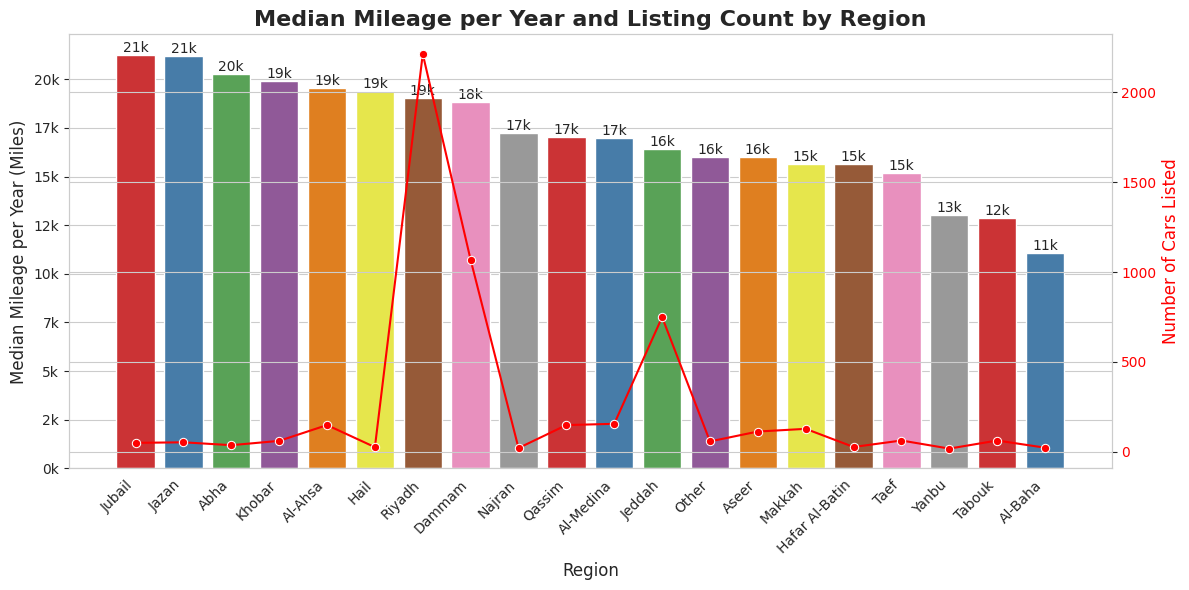

In [ ]:
region_stats_mileage = (
    df_EDA.groupby("Region")
    .agg(median_mileage=("Mileage_per_year", "median"),
         count=("Mileage_per_year", "size"))
    .reset_index()
    .sort_values("median_mileage", ascending=False)
)

fig, ax1 = plt.subplots(figsize=(12,6))
bars = sns.barplot(
    data=region_stats_mileage,
    x="Region",
    y="median_mileage",
    ax=ax1,
    palette="Set1"
)

# --- Helper for K formatting ---
def format_k(val):
    return f"{int(val/1000)}k"

# Add bar labels in K
for container in bars.containers:
    bars.bar_label(container, fmt=lambda v: format_k(v))

# Format y-axis in K
import matplotlib.ticker as mticker
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))

ax1.set_ylabel("Median Mileage per Year (Miles)", fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_title("Median Mileage per Year and Listing Count by Region", fontsize=16, weight="bold")

# --- Line plot ---
ax2 = ax1.twinx()
sns.lineplot(
    data=region_stats_mileage,
    x="Region",
    y="count",
    marker="o",
    sort=False,
    color="red",
    ax=ax2
)

ax2.set_ylabel("Number of Cars Listed", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


disini terlihat bahwa mayoritas daerah memiliki pemakaian dibawah rata2 yaitu 20k miles, kecuali Jubail dan Jazan. Sedangkan daerah dengan pemakaian terendah ada di Yanbu, Tabouk dan Al-Baha. Perlu di perhatikan bahwa region2 tersebut termasuk minor, karena jeddah, dammam dan riyadh sebagai pasar terbesar memiliki penggunaan di bawah rata2 yaitu 19k-17k.

/tmp/ipython-input-3237600164.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




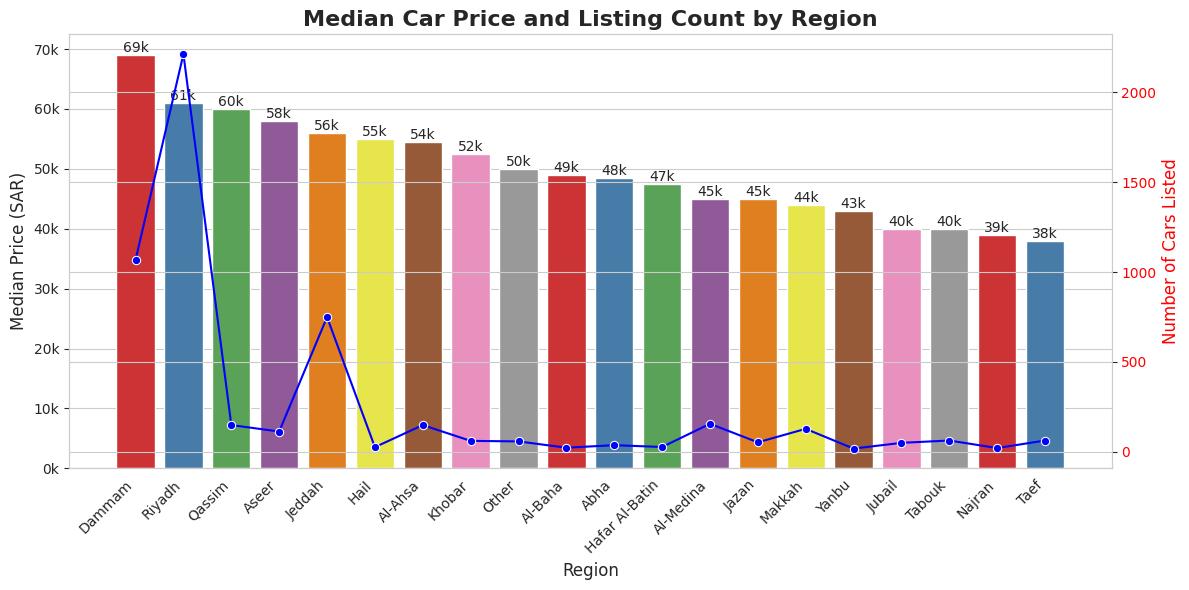

In [ ]:
region_stats = (
    df_EDA.groupby("Region")
    .agg(median_price=("Price", "median"),
         count=("Price", "size"))
    .reset_index()
    .sort_values("median_price", ascending=False)
)

fig, ax1 = plt.subplots(figsize=(12,6))
bars = sns.barplot(
    data=region_stats,
    x="Region",
    y="median_price",
    ax=ax1,
    palette="Set1"
)


def format_k(val):
    return f"{int(val/1000)}k"


for container in bars.containers:
    bars.bar_label(container, fmt=lambda v: format_k(v))

ax1.set_ylabel("Median Price (SAR)", fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_title("Median Car Price and Listing Count by Region", fontsize=16, weight="bold")

import matplotlib.ticker as mticker
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))


ax2 = ax1.twinx()
sns.lineplot(
    data=region_stats,
    x="Region",
    y="count",
    marker="o",
    sort=False,
    color="blue",
    ax=ax2
)

ax2.set_ylabel("Number of Cars Listed", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


Chart di atas memberikan gambaran yang jelas tentang persepsi nilai oleh penjual di syarah.com. mobil dengan harga median termahal ada di dammam dan riyadh, menunjukkan bahwa mobil yang dijual di daerah tersebut lebih mahal. Ini bisa dijelaskan dengan demografis daerah itu sendiri yang merupakan kota besar, dimana pengendara ekonom atas lebih banyak. ini berbanding terbalik dnegan daerah termurah yaitu median 40k ke bawah di Jubail, Tabouk, najran dan taef yang merupakan daerah terpencil, lebih didominasi oleh warga lokal yang lebih tradisional.

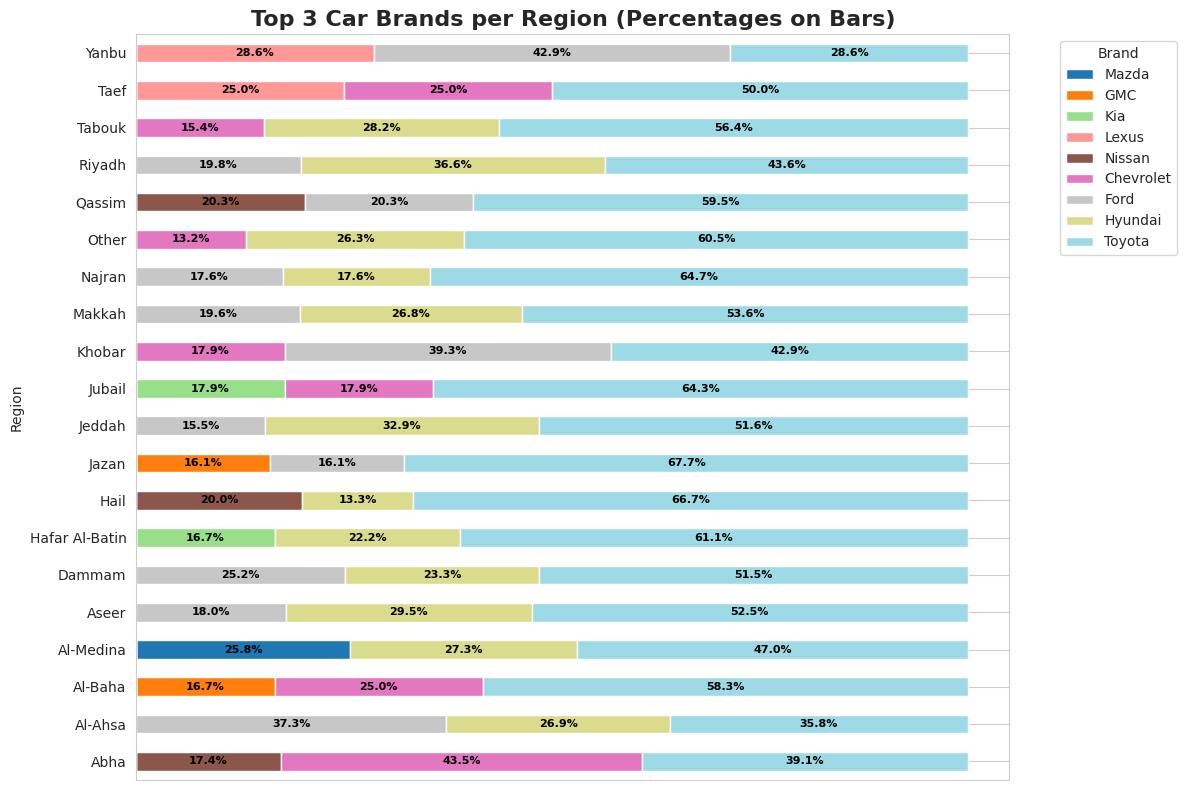

In [ ]:
top_n = 3

dfs = []
for region, group in df_EDA.groupby("Region"):
    counts = group[" Make "].value_counts()
    top_brands = counts.nlargest(top_n)
    top_brands_pct = (top_brands / top_brands.sum() * 100).reset_index()
    top_brands_pct.columns = ["Make", "Percentage"]
    top_brands_pct["Region"] = region
    dfs.append(top_brands_pct)

top_brands_df = pd.concat(dfs, ignore_index=True)

stacked_df = top_brands_df.pivot(index="Region", columns="Make", values="Percentage").fillna(0)

stacked_df_sorted = stacked_df.apply(lambda row: row.sort_values(ascending=True), axis=1)


col_order = stacked_df.mean().sort_values(ascending=True).index
stacked_df_sorted = stacked_df[col_order]
ax = stacked_df_sorted.plot(
    kind='barh',
    stacked=True,
    figsize=(12,8),
    colormap='tab20'
)

ax.set_xticks([])
ax.set_xlabel("")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if width > 0:
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{width:.1f}%',
                ha='center', va='center', fontsize=8, color='black', fontweight='bold')

plt.ylabel("Region")
plt.title(f"Top {top_n} Car Brands per Region (Percentages on Bars)", fontsize=16, weight='bold')
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Di chart diatas distribusi popularitas mobil bisa terlihat. Sesuai dengan analisa merek terpopuler sebelumnya kebanyakan daerah didominasi oleh toyota. 2 pengecualian ada di Abha dan Yanbu dimana Chevrolet mendominasi di daerah tersebut.

### Car Color vs Price


/tmp/ipython-input-2709391596.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




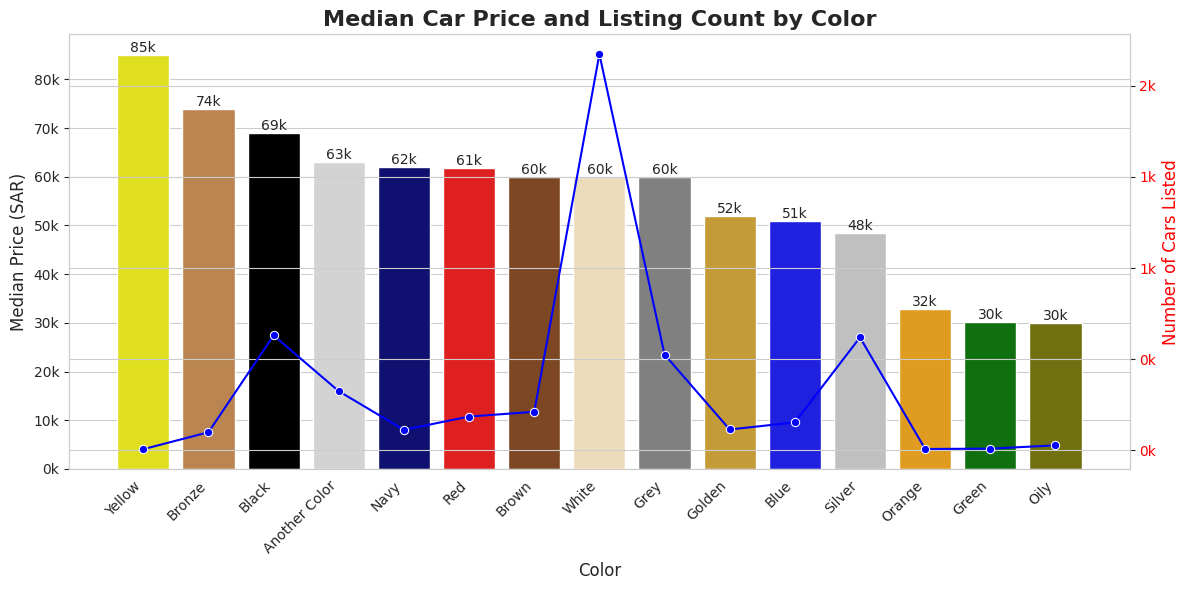

In [ ]:
import matplotlib.ticker as mticker

color_stats = (
    df_EDA.groupby("Color")
    .agg(median_price=("Price", "median"),
         count=("Price", "size"))
    .reset_index()
    .sort_values("median_price", ascending=False)
)

fig, ax1 = plt.subplots(figsize=(12,6))
bars = sns.barplot(
    data=color_stats,
    x="Color",
    y="median_price",
    ax=ax1,
    palette=color_map,
    order=color_stats["Color"]
)


for container in bars.containers:
    bars.bar_label(container, fmt=lambda v: f"{int(v/1000)}k")


ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax1.set_ylabel("Median Price (SAR)", fontsize=12)
ax1.set_xlabel("Color", fontsize=12)
ax1.set_title("Median Car Price and Listing Count by Color", fontsize=16, weight="bold")


ax2 = ax1.twinx()
sns.lineplot(
    data=color_stats,
    x="Color",
    y="count",
    marker="o",
    sort=False,
    color="blue",
    ax=ax2
)

ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax2.set_ylabel("Number of Cars Listed", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


Di chart di atas terlihat bahwa warna Kuning, bronze dan hitam adalah 3 warna termahal. Namun perlu digaris bawahi bahwa kuning dan bronze memiliki representasi yang sangat sedikit. Putih sebagai warna yang sangat lebih populer ternyata tidak memberikan efek dimana harganya termasuk rata2 di 60k median. 3 warna yang paling murah adalah orange, green dan oily green. Hal ini bisa dijelaskan dengan preferensi setiap orang dan warna unik sebuah brand, contohnya warna kuning sering terlihat di merek Lamborghini dan Bronze di Bentley, keduanya merek mahal. Sedangkan warna terbawah merupakan warna yang jarang ditemukan sesuai data jumlah listing.

### Do Certain Car Brand Owner Uses Their Car More?

/tmp/ipython-input-4232304915.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




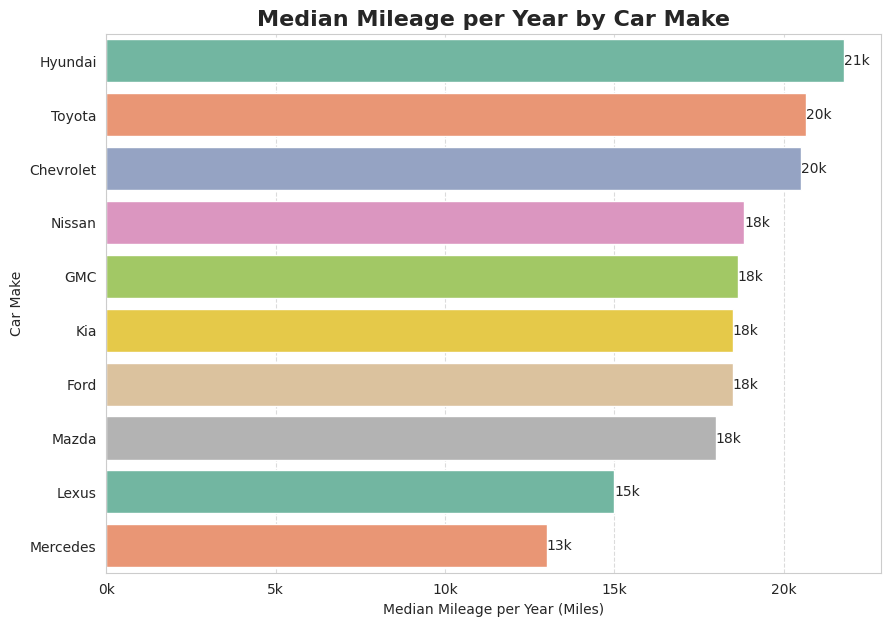

In [ ]:
import matplotlib.ticker as mticker

make_medians = (
    df_EDA[df_EDA[" Make "].isin(top_makes)]
    .groupby(" Make ")["Mileage_per_year"]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=df_EDA[df_EDA[" Make "].isin(top_makes)],
    y=" Make ",
    x="Mileage_per_year",
    estimator="median",
    order=make_medians.index,
    palette="Set2",
    errorbar=None
)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))

for container in ax.containers:
    ax.bar_label(container, fmt=lambda v: f"{int(v/1000)}k")

plt.title("Median Mileage per Year by Car Make", fontsize=16, weight="bold")
plt.ylabel("Car Make")
plt.xlabel("Median Mileage per Year (Miles)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Chart di atas ditujukan untuk melihat apakah ada perbedaan dari pola pengguna setiap brand mobil. Terlihat bahwa hyundai, chevrolet dan toyota lebih mendekati rata2 yaitu 20k, membuktikan merek2 tersebut bukanlah mobil rekreasi, berbanding terbalik dengan lexus dan mercedes yang merupakan mobil mewah, dimana market mereka didominasi kalangan atas yang memiliki budget lebih.

### Impact of Fuel Type vs Price

/tmp/ipython-input-2670244999.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




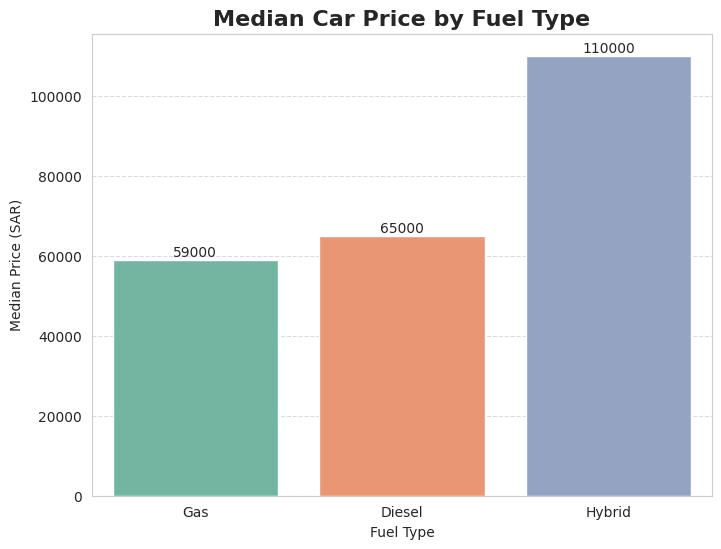

In [ ]:
plt.figure(figsize=(8,6))

ax=sns.barplot(
    data=df_EDA,
    x="Fuel_Type",
    y="Price",
    estimator="median",
    palette="Set2",
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Car Price by Fuel Type", fontsize=16, weight="bold")
plt.xlabel("Fuel Type")
plt.ylabel("Median Price (SAR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Chart di atas menunjukkan bahwa mobil bensin adalah termurah, sejauh SAR 6000 dibanding median harga mobil diesel. Hybrid sendiri harganya melambung tinggi karena tipe mesih tersebut didominasi mobil mewah dan kategori atas, seperti mercedes, bmw, dan beberapa merek supercar. Kelimpahan minyak bensin juga bisa menjadi faktor untuk mendorong harga mesin bensin ke bawah.

### Gear Type vs Price

/tmp/ipython-input-674693611.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




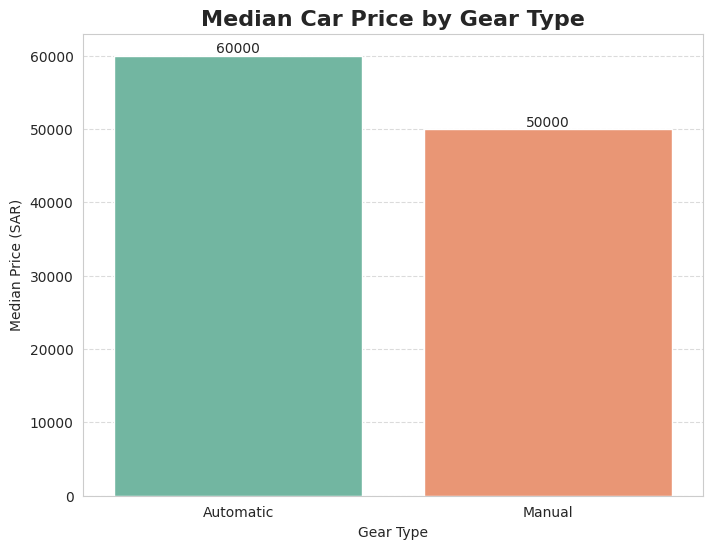

In [ ]:
plt.figure(figsize=(8,6))

ax=sns.barplot(
    data=df_EDA,
    x="Gear_Type",
    y="Price",
    estimator="median",
    palette="Set2",
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Car Price by Gear Type", fontsize=16, weight="bold")
plt.xlabel("Gear Type")
plt.ylabel("Median Price (SAR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Data ini menunjukkan adanya perbedaan 20% di median harga mobil automatic dan manual. Ini termasuk batas normal yang bisa ditemukan di banyak market dunia, dimana mobil automatic biasanya lebih mahal dari manual. Di demografis timur tengah dengan jalan yang jauh dan luas maka permintaan untuk transmisi yang praktis lebih besar.

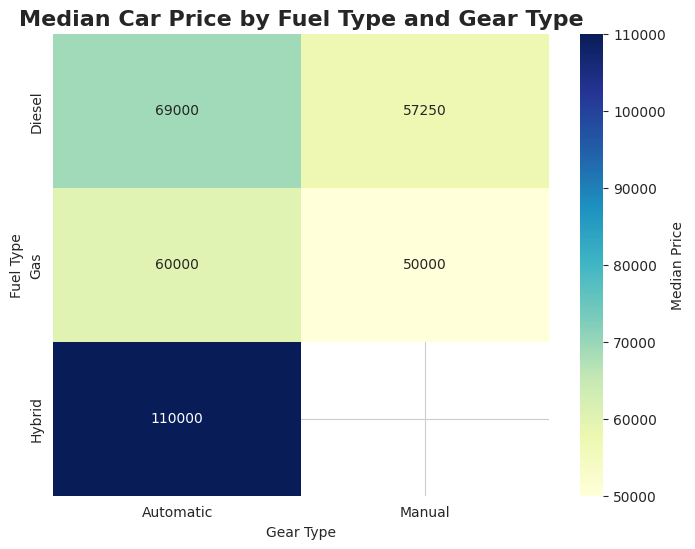

In [ ]:
pivot = df_EDA.pivot_table(
    index="Fuel_Type",
    columns="Gear_Type",
    values="Price",
    aggfunc="median"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={"label": "Median Price"})
plt.title("Median Car Price by Fuel Type and Gear Type", fontsize=16, weight="bold")
plt.ylabel("Fuel Type")
plt.xlabel("Gear Type")
plt.show()


Disini bisa terlihat bahwa hybrid tidak memiliki data manual, sesuai dengan asumsi merek pembuat yaitu merek mobil mewah. sedangkan harga kombinasi diesel dengan manual pun terbukti lebih murah walau dibandingkan dengan mobil automatic bensin.

### Engine Size vs Price

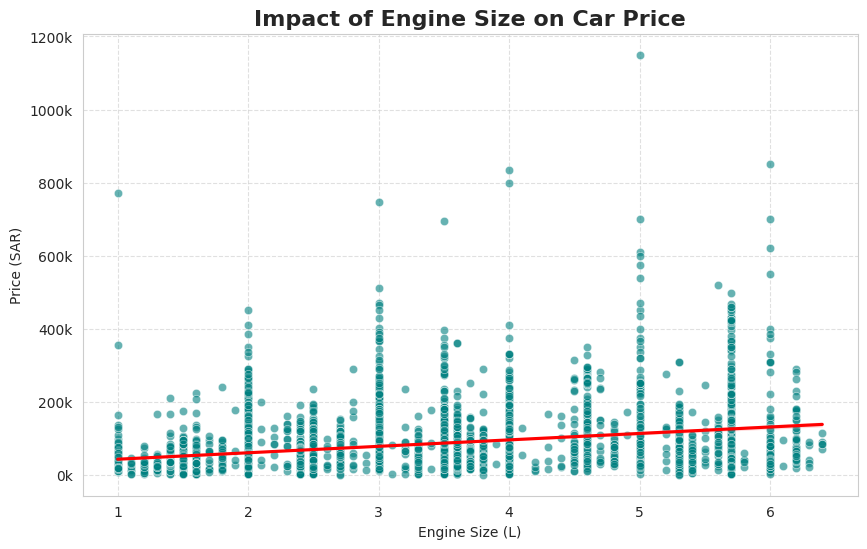

In [ ]:
import matplotlib.ticker as mticker

plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=df_EDA,
    x="Engine_Size",
    y="Price",
    alpha=0.6,
    color="teal"
)

sns.regplot(
    data=df_EDA,
    x="Engine_Size",
    y="Price",
    scatter=False,
    color="red",
    ax=ax
)

plt.title("Impact of Engine Size on Car Price", fontsize=16, weight="bold")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (SAR)")
plt.grid(True, linestyle="--", alpha=0.6)

# ✅ Format y-axis into k
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()


Engine size atau ukuran mesin biasanya adalah faktor besar terhadap harga. bisa dilihat bahwa distribusi mesih kebanyakan di antara 2 liter, 3 liter, dan 5-5.7 liter. Ini sesuai dengan demografis dimana kebanyakan mobil yang dijual seperti toyota land cruiser dan hilux adalah mobil berbadan besar seperti Pickup dan SUV, yang memerlukan mesin besar.

Ini juga dibuktikan dengan populasi mobil perkotaan ekonomis seperti hyundai accent, toyota camry dan hyundai sonata yang memiliki mesin 3 liter ke bawah. Bisa terlihat ada trend positif antara besar mesin dengan harga, dimana harga mobil dengan mesin 2L dengan 3L terpaut sekitar 20% kenaikan.

/tmp/ipython-input-491047783.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




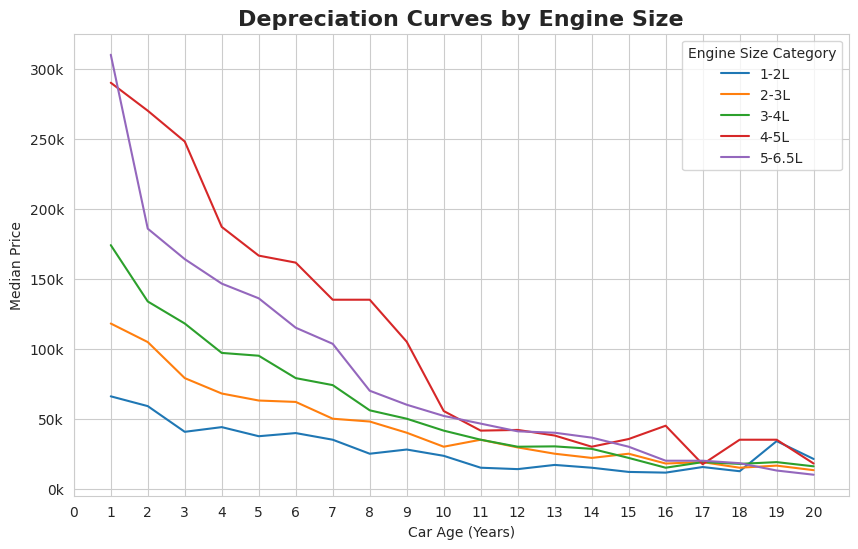

In [ ]:
bins = [1, 2, 3, 4, 5, 6.5]
labels = ["1-2L", "2-3L", "3-4L", "4-5L", "5-6.5L"]

df_EDA["Engine_Category"] = pd.cut(
    df_EDA["Engine_Size"], bins=bins, labels=labels, include_lowest=True
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_EDA,
    x="Age",
    y="Price",
    hue="Engine_Category",
    estimator="median",
    ci=None
)

plt.title("Depreciation Curves by Engine Size", fontsize=16, weight="bold")
plt.xlabel("Car Age (Years)")
plt.ylabel("Median Price")
plt.legend(title="Engine Size Category")

# format y-axis as k
import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

max_age = int(df_EDA["Age"].max())
plt.xticks(range(0, max_age+1, 1))

plt.show()


Chart di atas membuktikan persepsi market kepada mesin mobil. Mesin yang relatif kecil memiliki retensi harga terbaik sedangkan 2 kategori dengan retensi terburuk ada di atas 4 Liter. ini sesuai dengan trend manufaktur yang berhenti memproduksi mesin besar untuk mobil baru dan juga kondisi ketersediaan minyak dan politik. dibandingkan mesin 1-2L, mobil bermesin di atas 4L kehilangan lebih dari 80% harga jual dalam 10 tahun sedangkan mobil ekonomis kehilangan sekitar 50%.

/tmp/ipython-input-1899008312.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



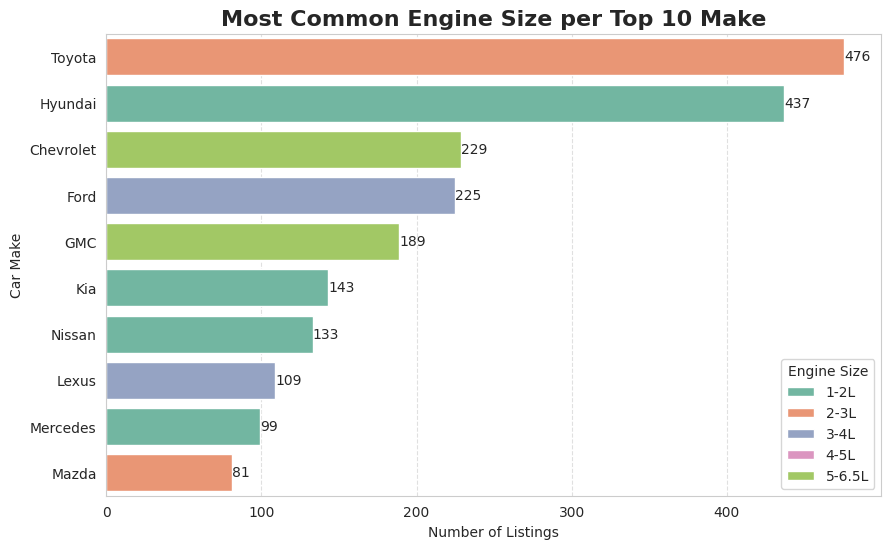

In [ ]:
df_top = df_EDA[df_EDA[" Make "].isin(top_makes)]

engine_count = df_top.groupby([" Make ", "Engine_Category"]).size().reset_index(name="Count")

most_common_engine = engine_count.loc[engine_count.groupby(" Make ")["Count"].idxmax()]

most_common_engine = most_common_engine.sort_values("Count", ascending=False)


plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=most_common_engine,
    y=" Make ",
    x="Count",
    hue="Engine_Category",
    dodge=False,
    palette="Set2"
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Most Common Engine Size per Top 10 Make", fontsize=16, weight="bold")
plt.xlabel("Number of Listings")
plt.ylabel("Car Make")
plt.legend(title="Engine Size")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


Disini distribusi mesin mobil per merek bisa terlihat. Demografis dari manufaktur adalah mesin medium-kecil untuk mobil luxury seperti mercedes dan lexus, sedangkan mobil merek amerika serikat seperti chevrolet dan ford ada di menengah ke atas. ini  sesuai dengan produk mereka yang di listing dimana ford memberi representasi pickup truk yang cukup banyak, sedangkan hyundai lebih ekonomis di 2L ke bawah.

### Options vs Price

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Origin', y='Price', data=df_EDA)
plt.title('Price Distribution by Car Origin')
plt.xlabel('Origin')
plt.ylabel('Price (SAR)')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()

/tmp/ipython-input-2008696720.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-2008696720.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




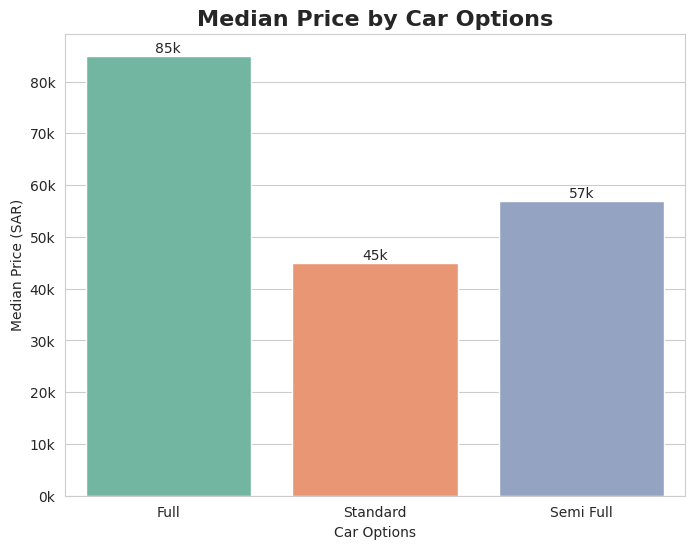

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(
    data=df_EDA,
    x="Options",
    y="Price",
    palette="Set2",
    estimator="median",
    ci=None
)

def format_k(val):
    return f'{int(val/1000)}k'
for container in ax.containers:
    ax.bar_label(container, fmt=format_k)

import matplotlib.ticker as mticker
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))
plt.title("Median Price by Car Options", fontsize=16, weight="bold")
plt.ylabel("Median Price (SAR)")
plt.xlabel("Car Options")
plt.show()


Sesuai dengan asumsi awal, ada perbedaan harga antara jenis opsi mobil. terlihat bahwa mobil dengan opsi full hampir 90% lebih mahal, sedangkan mobil semi full sekitar 30% lebih mahal. semi full sendiri terpaut 65% lebih murah dari full.

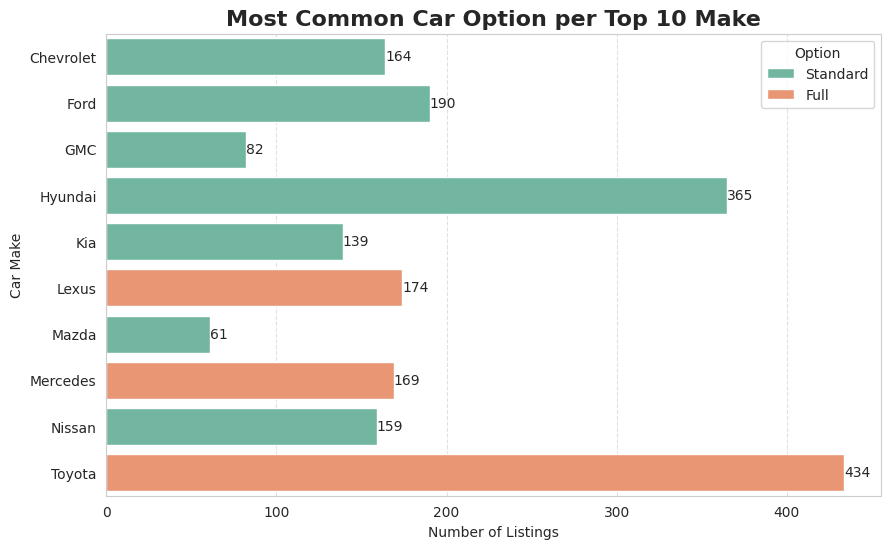

In [ ]:
df_top = df_EDA[df_EDA[" Make "].isin(top_makes)]
options_count = df_top.groupby([" Make ", "Options"]).size().reset_index(name="Count")


most_common_options = options_count.loc[options_count.groupby(" Make ")["Count"].idxmax()]


plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=most_common_options,
    y=" Make ",
    x="Count",
    hue="Options",
    dodge=False,
    palette="Set2"
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Most Common Car Option per Top 10 Make", fontsize=16, weight="bold")
plt.xlabel("Number of Listings")
plt.ylabel("Car Make")
plt.legend(title="Option")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


Distribusi di atas menggambarkan demografis pembeli setiap kelas merek, dimana pembeli mobil luxury seperti lexus dan mazda lebih memilih untuk membeli tipe teratas. Namun pengguna toyota juga memilih untuk membeli mobil dengan tipe full, menunjukkan persepsi market kepada mobil toyota adalah bukan mobil yang dikategori murah ke bawah.

### Modelling

<h1> Data Loading  </h1>

Bentuk: Distribusi pada histogram ini mengarah skewed kanan. Ini menunjukkan bahwa sebagian besar mobil terjual dengan harga yang lebih rendah, sementara ada beberapa mobil yang harganya sangat tinggi (ekor yang panjang di sisi kanan distribusi).

Interpretasi: Pola ini sangat umum untuk harga mobil bekas. Kebanyakan mobil bekas harganya terjangkau, tetapi ada sejumlah kecil mobil mewah, langka, atau berperforma tinggi yang harganya jauh lebih mahal. Inilah alasan mengapa harga rata-rata (53.248 SR) lebih tinggi dari kisaran harga di mana sebagian besar mobil terjual (modusnya kemungkinan besar berada di kisaran 20.000-30.000 SR).

<h1> Delete all rows with any missing values.</h1>

In [ ]:
# --- Data Preprocessing and Pipeline with ColumnTransformer ---

print("--- Step 1: Handling Missing Values (Deletion) ---")
# Convert 'Price' to numeric and handle non-numeric values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# FIX: Delete rows where the price is 0
df = df[df['Price'] > 0]
# Delete all rows with any missing values.
df.dropna(inplace=True)
print(f"Dataset size after deletion: {df.shape[0]} rows.")

--- Step 1: Handling Missing Values (Deletion) ---
Dataset size after deletion: 5508 rows.


notes:
- Converts the Price column to a numeric format, replacing any non-numeric values with missing values.
- Filters out any rows where the price is 0, as this is likely a data error.
- Deletes all rows that contain any missing values, ensuring the dataset is complete.

# Train Test Split

In [ ]:
X = df.drop(columns=['Price'])
y = df["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<h1> Modeling & Evaluation </h1>

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


<h1>Model Comparison</h1> <small> using Cross validation method </small>

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
catboost = CatBoostRegressor(verbose=0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor

numerical_features = ['Mileage', 'Engine_Size', 'Year']

categorical_features = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region']


preprocessor_non_catboost = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

preprocessor_catboost = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ],
    remainder='drop'
)

display(preprocessor_non_catboost)
display(preprocessor_catboost)

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 ['Mileage', 'Engine_Size', 'Year']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Make', 'Type', 'Origin', 'Color', 'Options',
                                  'Fuel_Type', 'Gear_Type', 'Region'])])

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 ['Mileage', 'Engine_Size', 'Year']),
                                ('cat', 'passthrough',
                                 ['Make', 'Type', 'Origin', 'Color', 'Options',
                                  'Fuel_Type', 'Gear_Type', 'Region'])])

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_percentage_error

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

print("--- Starting Model Comparison ---")
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(n_jobs=-1),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": lgb.LGBMRegressor(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostRegressor(random_seed=42, verbose=0, cat_features=list(range(len(numerical_features), len(numerical_features) + len(categorical_features))))
}
results = []

for name, model in models.items():
    print(f"Evaluating model: {name}...")

    if name == "CatBoost":
        preprocessor_to_use = preprocessor_catboost
    else:
        preprocessor_to_use = preprocessor_non_catboost



    logtransform_model = TransformedTargetRegressor(regressor=model,
                                                    func=np.log1p,
                                                    inverse_func=np.expm1)


    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_to_use),
        ('logtransform_model', logtransform_model)
    ])

    mae_scores = cross_val_score(
        model_pipeline, X_train, y_train,
        cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
    )
    mae_scores = -1 * mae_scores
    mae_mean = np.mean(mae_scores)
    mae_std = np.std(mae_scores)

    mape_scores = cross_val_score(
        model_pipeline, X_train, y_train,
        cv=5, scoring=mape_scorer, n_jobs=-1
    )
    mape_scores = -1 * mape_scores
    mape_mean = np.mean(mape_scores)
    mape_std = np.std(mape_scores)

    results.append({
        'Model': name,
        'MAE Mean': mae_mean,
        'MAE Std': mae_std,
        'MAPE Mean': mape_mean,
        'MAPE Std': mape_std
    })

    print(f"Model: {name} | MAE: {mae_mean:.4f} ± {mae_std:.4f} | MAPE: {mape_mean:.4f} ± {mape_std:.4f}")


results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='MAE Mean')


print("\n--- Model Comparison Results ---")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

best_model_name = results_df.iloc[0]['Model']
print(f"\nModel terbaik adalah: {best_model_name}")





--- Starting Model Comparison ---
Evaluating model: Linear Regression...
Model: Linear Regression | MAE: 20179.1669 ± 1223.7032 | MAPE: 19.1193 ± 36.6191
Evaluating model: Ridge...
Model: Ridge | MAE: 19946.6675 ± 1430.5109 | MAPE: 18.6895 ± 35.7820
Evaluating model: Lasso...
Model: Lasso | MAE: 44185.9842 ± 1510.8093 | MAPE: 13.8815 ± 25.1768
Evaluating model: K-Neighbors Regressor...
Model: K-Neighbors Regressor | MAE: 20927.3073 ± 1327.3919 | MAPE: 40.2786 ± 78.8119
Evaluating model: Decision Tree Regressor...
Model: Decision Tree Regressor | MAE: 21227.2748 ± 1119.1974 | MAPE: 40.6713 ± 79.5021
Evaluating model: Random Forest...
Model: Random Forest | MAE: 17586.5979 ± 1261.0191 | MAPE: 28.4838 ± 55.4282
Evaluating model: Gradient Boosting...
Model: Gradient Boosting | MAE: 20301.0257 ± 1239.6422 | MAPE: 25.7004 ± 49.7473
Evaluating model: XGBoost...
Model: XGBoost | MAE: 16999.7713 ± 1448.7028 | MAPE: 25.9336 ± 50.3118
Evaluating model: LightGBM...
Model: LightGBM | MAE: 18633.296

In [ ]:
import pandas as pd
import numpy as np
import subprocess
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import uniform, randint
import shap




# Model 1: With ColumnTransformer (Scaling Numerical Features)

print("\n Training Model 1: With ColumnTransformer (Scaling Numerical Features)")

numerical_features = ['Mileage', 'Engine_Size', 'Year']
categorical_features = [
    'Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type',
    'Gear_Type', 'Region', 'Negotiable'
]


preprocessor_catboost = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ],
    remainder='drop'
)


# Identify the indices of categorical features in the transformed data.

cat_features_indices = list(range(len(numerical_features), len(numerical_features) + len(categorical_features)))

model_1_catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',
    random_seed=42,
    verbose=0,
    cat_features=cat_features_indices
)

# Create logtransformed model

logtransform_catboost_1 = TransformedTargetRegressor(regressor=model_1_catboost,
                                                func=np.log1p,
                                                inverse_func=np.expm1)



# Create the pipeline for Model 1.
pipeline_1 = Pipeline(steps=[
    ('preprocessor', preprocessor_catboost),
    ('logtransform_model', logtransform_catboost_1)
])


pipeline_1.fit(X_train, y_train)

# Make predictions and evaluate Model 1.
y_pred_1 = pipeline_1.predict(X_test)
mae_1 = mean_absolute_error(y_test, y_pred_1)
mape_1 = mean_absolute_percentage_error(y_test, y_pred_1)

print("\n Model 1 Results (With ColumnTransformer)")
print(f"Mean Absolute Error (MAE): {mae_1:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_1:.2f}%")


# --- Model 2: Without ColumnTransformer (CatBoost handles everything) ---

print("\n Training Model 2: Without ColumnTransformer (CatBoost handles everything) ")

# Define the CatBoost model directly. CatBoost handles categorical features automatically.
model_2_catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',
    random_seed=42,
    verbose=0,
    cat_features=categorical_features
)

logtransform_catboost_2 = TransformedTargetRegressor(regressor=model_2_catboost,
                                                func=np.log1p,
                                                inverse_func=np.expm1)

# Create a simple pipeline for Model 2.
pipeline_2 = Pipeline(steps=[
    ('logtransform_model', logtransform_catboost_2)
])

# Fit the pipeline to the training data.
pipeline_2.fit(X_train, y_train)

# Make predictions and evaluate Model 2.
y_pred_2 = pipeline_2.predict(X_test)
mae_2 = mean_absolute_error(y_test, y_pred_2)
mape_2 = mean_absolute_percentage_error(y_test, y_pred_2)


print("\n Model 2 Results (Without ColumnTransformer) ")
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_2:.2f}%")




 Training Model 1: With ColumnTransformer (Scaling Numerical Features)

 Model 1 Results (With ColumnTransformer)
Mean Absolute Error (MAE): 14613.68
Mean Absolute Percentage Error (MAPE): 0.95%

 Training Model 2: Without ColumnTransformer (CatBoost handles everything) 

 Model 2 Results (Without ColumnTransformer) 
Mean Absolute Error (MAE): 14179.87
Mean Absolute Percentage Error (MAPE): 0.91%


In [ ]:
pipeline_2

Pipeline(steps=[('logtransform_model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x7d12ae3e8a40>))])

<h1> Hyperparameter Tuning </h1>

In [ ]:
from scipy.stats import uniform, randint




param_distributions = {
    'logtransform_model__regressor__iterations': randint(100, 1000),
    'logtransform_model__regressor__learning_rate': uniform(0.01, 0.2),
    'logtransform_model__regressor__depth': randint(4, 10),
    'logtransform_model__regressor__l2_leaf_reg': uniform(1, 10),
    'logtransform_model__regressor__bagging_temperature': uniform(0, 1),
    'logtransform_model__regressor__boosting_type': ['Plain', 'Ordered'],
    'logtransform_model__regressor__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
}

cat_features = [
    'Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type',
    'Gear_Type', 'Region', 'Negotiable'
]

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline_2,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('logtransform_model',
                                              TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                         inverse_func=<ufunc 'expm1'>,
                                                                         regressor=<catboost.core.CatBoostRegressor object at 0x7d12ae3e8a40>))]),
                   n_jobs=-1,
                   param_distributions={'logtransform_model__regressor__bagging_temperature': <scipy.stats._distn_infrastructure.rv_continuous_...
                                        'logtransform_model__regressor__iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d12ab75c8f0>,
                                        'logtransform_model__regressor__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d12ab75fad0>,
                                        'logtransform_model__regressor__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d12ac390800>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:

print("\n--- Training Final Model with Best Hyperparameters ---")
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print(best_params)
best_model


--- Training Final Model with Best Hyperparameters ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

{'logtransform_model__regressor__bagging_temperature': np.float64(0.43194501864211576), 'logtransform_model__regressor__boosting_type': 'Plain', 'logtransform_model__regressor__depth': 6, 'logtransform_model__regressor__grow_policy': 'Lossguide', 'logtransform_model__regressor__iterations': 610, 'logtransform_model__regressor__l2_leaf_reg': np.float64(2.3949386065204186), 'logtransform_model__regressor__learning_rate': np.float64(0.06842892970704363)}


Pipeline(steps=[('logtransform_model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x7d12ac391dc0>))])

In [ ]:
print(random_search.best_score_) # Best Cross Validation MAE

-16219.685833887068


<h1> Residual Analysis </h1>

In [ ]:
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)
## Please calculate MAE, MAPE and RMSE from this


--- Residual Analysis ---


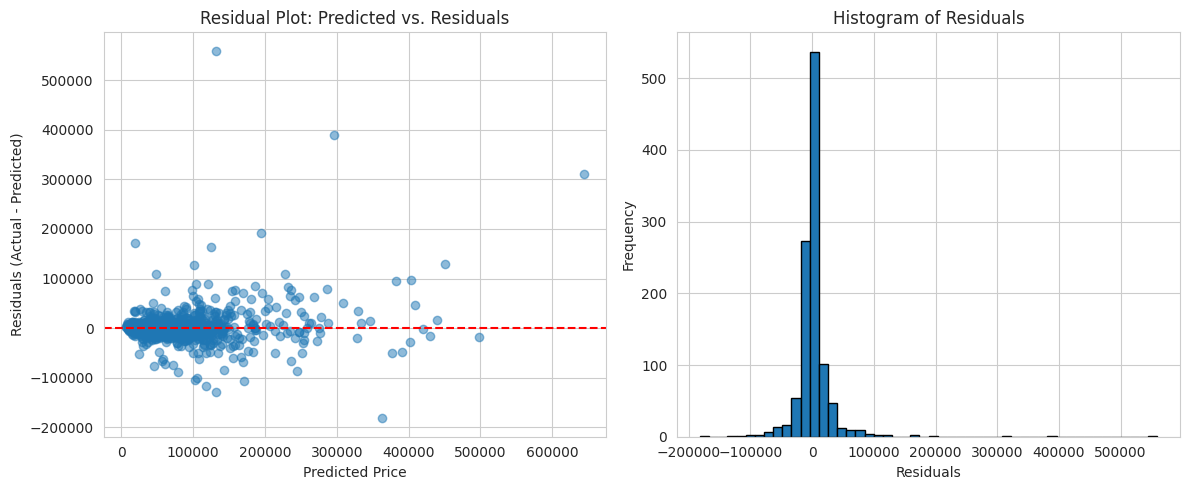

---------------------------


In [ ]:

print("\n--- Residual Analysis ---")

# Calculate residuals
residuals = y_test - y_pred_test_best

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Residual Plot
ax1.scatter(y_pred_2, residuals, alpha=0.5)
ax1.set_title('Residual Plot: Predicted vs. Residuals')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals (Actual - Predicted)')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.grid(True)


# Plot 2: Histogram of Residuals
ax2.hist(residuals, bins=50, edgecolor='k')
ax2.set_title('Histogram of Residuals')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.grid(True)
plt.tight_layout()

plt.show()

print("---------------------------")


<h1> Testing residual - statistical summaries ( positive residuals, distribution skeweness, and bias indicator ) </h1>

In [ ]:
import scipy.stats as stats

# Basic stats
mean_resid = np.mean(residuals)
median_resid = np.median(residuals)
std_resid = np.std(residuals)
skew_resid = stats.skew(residuals)
kurt_resid = stats.kurtosis(residuals)

# Positive residuals (underprediction)
positive_resid = residuals[residuals > 0]
mean_pos = np.mean(positive_resid)
median_pos = np.median(positive_resid)
std_pos = np.std(positive_resid)

print(f"Residual Mean: {mean_resid:.4f}")
print(f"Residual Median: {median_resid:.4f}")
print(f"Residual Std Dev: {std_resid:.4f}")
print(f"Residual Skewness: {skew_resid:.4f}")
print(f"Residual Kurtosis: {kurt_resid:.4f}")
print(f"Positive Residuals → Mean: {mean_pos:.4f}, Median: {median_pos:.4f}, Std Dev: {std_pos:.4f}")

Residual Mean: 1898.1755
Residual Median: -85.3366
Residual Std Dev: 33268.5472
Residual Skewness: 6.6962
Residual Kurtosis: 96.9120
Positive Residuals → Mean: 16671.6906, Median: 6624.6446, Std Dev: 38186.6536


/tmp/ipython-input-3746821641.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, color='purple')


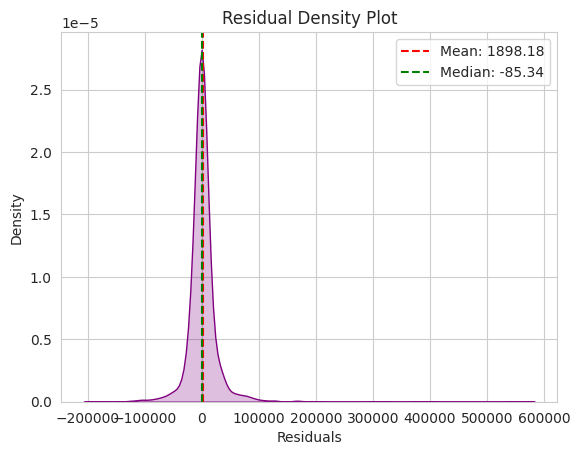

In [ ]:
sns.kdeplot(residuals, shade=True, color='purple')
plt.axvline(mean_resid, color='red', linestyle='--', label=f"Mean: {mean_resid:.2f}")
plt.axvline(median_resid, color='green', linestyle='--', label=f"Median: {median_resid:.2f}")
plt.title("Residual Density Plot")
plt.xlabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

<small> small explanation :What the Plot Shows
- Sharp peak near zero: Most residuals (errors) are close to zero, which means your model is generally making accurate predictions.
- Mean ≈ 1898.18: On average, your model slightly underpredicts the target variable (since residual = actual − predicted and mean is positive).
- Median ≈ −85.34: The middle residual is slightly negative, suggesting a small bias toward overprediction in some cases.
- Mean ≠ Median: This slight mismatch hints at a skewed distribution—likely a few large underpredictions pulling the mean upward.
- Long right tail: If the plot stretches more to the right, it confirms that some predictions are significantly lower than actual values (i.e., large positive residuals).
</small>

In [ ]:
import pandas as pd
import numpy as np

# Buat DataFrame dari nilai aktual dan prediksi
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_best
})
df['Residual'] = df['Actual'] - df['Predicted']

# Tambahkan kolom kuartil berdasarkan harga aktual
df['Price Quartile'] = pd.qcut(df['Actual'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

# Hitung statistik residual per kuartil
quartile_stats = df.groupby('Price Quartile')['Residual'].agg([
    ('Mean Residual', 'mean'),
    ('Median Residual', 'median'),
    ('Std Dev Residual', 'std'),
    ('Max Residual', 'max'),
    ('Min Residual', 'min')
]).reset_index()

# Tampilkan hasil
print("\n--- Residual Analysis by Price Quartile ---")
print(quartile_stats.to_markdown(index=False))


--- Residual Analysis by Price Quartile ---
| Price Quartile   |   Mean Residual |   Median Residual |   Std Dev Residual |   Max Residual |   Min Residual |
|:-----------------|----------------:|------------------:|-------------------:|---------------:|---------------:|
| Q1 (Low)         |      -6497.08   |         -2179.67  |            18526.3 |        13156   |      -127766   |
| Q2               |      -1690.48   |          -296.587 |            10598.9 |        35042.3 |       -62367.6 |
| Q3               |         43.1625 |          1255.86  |            16366.8 |        50368   |      -106101   |
| Q4 (High)        |      16243.5    |          6190.53  |            59371.8 |       559115   |      -181849   |


/tmp/ipython-input-2602425396.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_stats = df.groupby('Price Quartile')['Residual'].agg([


<small> penjelasan:
 Interpretasi
- Q1 (Low): Model cenderung sedikit overpredict (residual negatif).
- Q4 (High): Model sering underpredict (residual positif besar).
- Std Dev meningkat di kuartil atas → error lebih besar dan tidak stabil di harga tinggi.
- Median vs. Mean: Jika median jauh dari mean, bisa jadi distribusi residualnya skewed.
</small>

<h1> SHAP Analysis </h1>


--- SHAP Analysis for Model 2 ---

SHAP Summary Plot:


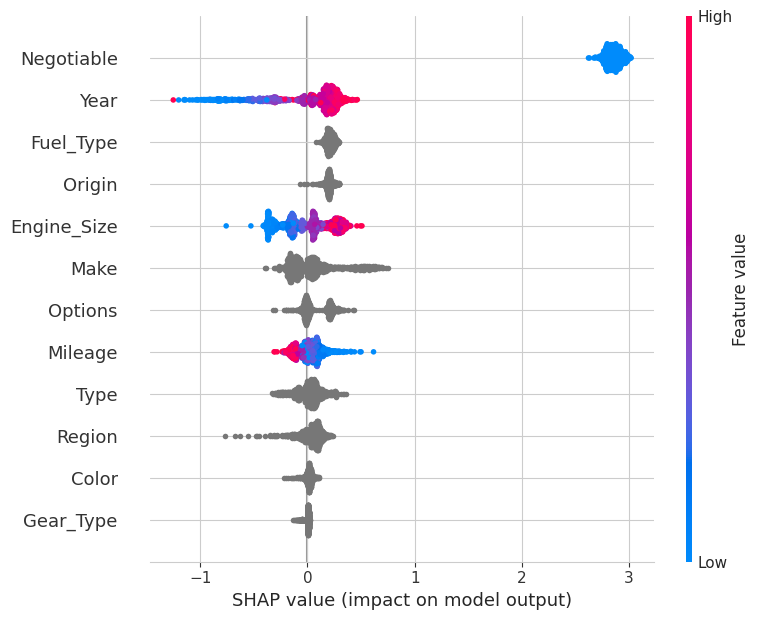

---------------------


In [ ]:
import shap
# --- SHAP Analysis for Model 2 ---

print("\n--- SHAP Analysis for Model 2 ---")
# Use TreeExplainer for tree-based models like CatBoost.
explainer = shap.TreeExplainer(model_2)
# Calculate SHAP values for the test set.
shap_values = explainer.shap_values(X_test)

# Display a SHAP summary plot to show feature importance.
print("\nSHAP Summary Plot:")
shap.summary_plot(shap_values, X_test)
print("---------------------")

<p>A summary plot can show which features are the most important overall for your model. For our used car price prediction, SHAP could show that Mileage and Year are the most influential factors in determining price.</p>
<h4> Feature Explanation </h4>
Negotiable - Whether the price is negotiable, non-negotiable listings often signal firm pricing or premium value.
Year - Newer cars typically have higher resale value due to lower depreciation.
Fuel_Type - Diesel, hybrid, or electric variants may command higher prices depending on market preferences.
Origin - Country of manufacture can affect perceived quality and resale value (e.g., Japan vs. China vs. Germany).
Engine_size - Larger engines often imply performance or luxury, which increases price.
Make - Brand reputation matters — luxury brands like Lexus or Mercedes boost value.
Options - Fully loaded trims (e.g., sunroof, leather seats) add significant resale value.
Mileage - Lower mileage = less wear, higher value. High mileage pulls price down.
Type - SUV, sedan, pickup — body type affects demand and pricing.
Region - Location affects market pricing — urban vs. rural, or regional demand differences
Color - Some colors (e.g., black, white) may have better resale appeal.
Gear_Type - Automatic vs. manual — automatics often fetch higher prices in urban markets.

<h1> Model Explanation </h1>
### Mekanisme Ordered Boosting pada CatBoost

Mekanisme boosting pada CatBoost disebut **Ordered Boosting**, dan inilah yang membedakannya secara fundamental dari model-model lain seperti XGBoost dan LightGBM. Pada dasarnya, Ordered Boosting melatih model dengan cara yang sangat cerdas untuk mencegah *overfitting* dan bias.

#### Apa itu Ordered Boosting?

Ordered Boosting bekerja dengan melatih setiap iterasi dalam urutan yang **berbeda** dari yang sebelumnya. Ini adalah solusi unik untuk masalah *prediction shift*—bias yang terjadi ketika model "mengintip" data yang sedang diprediksi.

Pada algoritma boosting tradisional, model menggunakan seluruh dataset untuk menghitung kesalahan (gradien) dari iterasi sebelumnya. Hal ini dapat membuat model menjadi terlalu spesifik pada data pelatihan dan gagal bergeneralisasi pada data baru.

**CatBoost mengatasi masalah ini dengan alur kerja berikut:**

1.  **Permutasi Acak (Random Permutation):** CatBoost membuat susunan acak baru dari dataset Anda.
2.  **Pelatihan Berurutan (Sequential Training):** Model melatih setiap iterasi baru pada data yang diurutkan secara acak.
3.  **"Melihat Hanya Masa Lalu" (Seeing Only the Past):** Inilah konsep kuncinya. Saat model berada di suatu titik data, ia hanya menghitung gradien (kesalahan) menggunakan iterasi yang dilatih pada titik data yang datang **sebelumnya** dalam urutan acak tersebut. Model tidak pernah menggunakan titik data saat ini atau yang datang setelahnya untuk menghitung gradien.

Karena setiap gradien dihitung dari model yang tidak memiliki pengetahuan sebelumnya tentang variabel target untuk titik data spesifik tersebut, model akan belajar dari kesalahan yang **tidak bias**. Hasilnya adalah model yang jauh lebih tangguh dan akurat saat berhadapan dengan data baru.

### Fitur-Fitur utama CatBoost
peran dari **Categorical Handling dan Boosting** dalam memecahkan masalah pada model lainnya yang ada pada CatBoost yaitu:
1. Penangangan fitur kategori secara otomatis mengeliminasi pengunaan one-hot encoding dan sebagainnya
2. mekanisme boosting **Ordered Boosting ** dirancang untuk tahap terhadap bias dan overfitting. pengunaan ordered boosting menghindari terjadinya overfitting dan bias karena gradien/ loss berdasarkan titik data yang belum pernah dipelajari oleh model.
